# Прогнозирование покупательской активности интернет-магазина

## Описание проекта

### Цель проекта

Интернет-магазин «В один клик» продаёт разные товары: для детей, для дома, мелкую бытовую технику, косметику и даже продукты. Отчёт магазина за прошлый период показал, что активность покупателей начала снижаться. Привлекать новых клиентов уже не так эффективно: о магазине и так знает большая часть целевой аудитории. Возможный выход — удерживать активность постоянных клиентов. Сделать это можно с помощью персонализированных предложений.

Задачи:
- Нужно построить модель, которая предскажет вероятность снижения покупательской активности клиента в следующие три месяца.
- В исследование нужно включить дополнительные данные финансового департамента о прибыльности клиента: какой доход каждый покупатель приносил компании за последние три месяца.
- Используя данные модели и данные о прибыльности клиентов, нужно выделить сегменты покупателей и разработать для них персонализированные предложения.

### Исходные данные

Для разработки модели МО заказчик предоставил следующую информацию:

**`market_file.csv`**

Таблица, которая содержит данные о поведении покупателя на сайте, о коммуникациях с покупателем и его продуктовом поведении.
- `id` — номер покупателя в корпоративной базе данных.
- `Покупательская активность` — рассчитанный класс покупательской активности (целевой признак): «снизилась» или «прежний уровень».
- `Тип сервиса` — уровень сервиса, например «премиум» и «стандарт».
- `Разрешить сообщать` — информация о том, можно ли присылать покупателю дополнительные предложения о товаре. Согласие на это даёт покупатель.
- `Маркет_актив_6_мес` — среднемесячное значение маркетинговых коммуникаций компании, которое приходилось на покупателя за последние 6 месяцев. Это значение показывает, какое число рассылок, звонков, показов рекламы и прочего приходилось на клиента.
- `Маркет_актив_тек_мес` — количество маркетинговых коммуникаций в текущем месяце.
- `Длительность` — значение, которое показывает, сколько дней прошло с момента регистрации покупателя на сайте.
- `Акционные_покупки` — среднемесячная доля покупок по акции от общего числа покупок за последние 6 месяцев.
- `Популярная_категория` — самая популярная категория товаров у покупателя за последние 6 месяцев.
- `Средний_просмотр_категорий_за_визит` — показывает, сколько в среднем категорий покупатель просмотрел за визит в течение последнего месяца.
- `Неоплаченные_продукты_штук_квартал` — общее число неоплаченных товаров в корзине за последние 3 месяца.
- `Ошибка_сервиса` — число сбоев, которые коснулись покупателя во время посещения сайта.
- `Страниц_за_визит` — среднее количество страниц, которые просмотрел покупатель за один визит на сайт за последние 3 месяца.

**`market_money.csv`**

Таблица с данными о выручке, которую получает магазин с покупателя, то есть сколько покупатель всего потратил за период взаимодействия с сайтом.

- `id` — номер покупателя в корпоративной базе данных.
- `Период` — название периода, во время которого зафиксирована выручка. Например, 'текущий_месяц' или 'предыдущий_месяц'.
- `Выручка` — сумма выручки за период.

**`market_time.csv`**

Таблица с данными о времени (в минутах), которое покупатель провёл на сайте в течение периода.

- `id` — номер покупателя в корпоративной базе данных.
- `Период` — название периода, во время которого зафиксировано общее время.
- `минут` — значение времени, проведённого на сайте, в минутах.

**`money.csv`**

Таблица с данными о среднемесячной прибыли покупателя за последние 3 месяца: какую прибыль получает магазин от продаж каждому покупателю.

- `id` — номер покупателя в корпоративной базе данных.
- `Прибыл` — значение прибыли.

### Этапы проекта

Решать задачу будем в два этапа:
1. Разработаем модель, которая предскажет вероятность снижения покупательской активности.

2. Выделим сегмент покупателей, проанализируем его и предложим, как увеличить его покупательскую активность. Используем данные моделирования, данные о прибыли покупателей и исходные данные (если понадобятся).

О качестве данных ничего не известно. Перед тем как приступить к разработке модели машинного обучения, понадобится обзор данных и, при необходимости, предобработка.

Таким образом проект пройдет в следующие этапы:

- Обзор данных.
- Предобработка данных.
- Исследовательский анализ данных.
- Объединение таблиц.
- Корреляционный анализ.
- Обучение моделей.
- Сегментация покупателей.
- Итоговые выводы.

## Обзор данных

### Получение данных

Загрузим данные из csv-файлов в датафреймы c помощью библиотеки pandas.

In [1]:
## импортируем необходимые библиотеки----------------------------------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import shap

# загружаем функцию для разделения выборок
from sklearn.model_selection import train_test_split 

# загружаем инструменты для автоподбора гиперпараметров
from sklearn.model_selection import (
    RandomizedSearchCV,
)

# загружаем классы моделей
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# загружаем метрики
from sklearn.metrics import (
    accuracy_score,
)

# загружаем класс для работы с пайплайнами
from sklearn.pipeline import Pipeline

# загружаем классы для преобразования данных
from sklearn.preprocessing import (
    OneHotEncoder, 
    OrdinalEncoder, 
    StandardScaler, 
    MinMaxScaler, 
)    
from sklearn.compose import ColumnTransformer

# загружаем класс для работы с пропусками
from sklearn.impute import SimpleImputer

## константы----------------------------------------------------------------------------
RANDOM_STATE = 42  # константа для фиксации данных при обучении моделей, чтобы получать одинаковые результаты при пересчёте 
TEST_SIZE = 0.25   # размер тестовой выборки

Ячейка для выравнивания всех таблиц markdown:

In [2]:
%%html
<style>
table {float:left}
</style>

In [3]:
# создаем датафреймы из файлов .csv
market_file  = pd.read_csv('market_file.csv', sep=',')
market_money = pd.read_csv('market_money.csv', sep=',')
market_time  = pd.read_csv('market_time.csv', sep=',')
money        = pd.read_csv('money.csv', sep=';', decimal=',')

### Общая информация

Выведем первые строки датафреймов и получим общую информацию.

**Рассмотрим датафрейм `market_file`.**

In [4]:
# выведем первые 5 строк
market_file.head()

,id,Покупательская активность,Тип сервиса,Разрешить сообщать,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Популярная_категория,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит
0,215348,Снизилась,премиум,да,3.4,5,121,0.00,Товары для детей,6,2,1,5
1,215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5
2,215350,Снизилась,стандартт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5
3,215351,Снизилась,стандартт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4
4,215352,Снизилась,стандартт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2


In [5]:
# получим общую информацию
market_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   1300 non-null   int64  
 1   Покупательская активность            1300 non-null   object 
 2   Тип сервиса                          1300 non-null   object 
 3   Разрешить сообщать                   1300 non-null   object 
 4   Маркет_актив_6_мес                   1300 non-null   float64
 5   Маркет_актив_тек_мес                 1300 non-null   int64  
 6   Длительность                         1300 non-null   int64  
 7   Акционные_покупки                    1300 non-null   float64
 8   Популярная_категория                 1300 non-null   object 
 9   Средний_просмотр_категорий_за_визит  1300 non-null   int64  
 10  Неоплаченные_продукты_штук_квартал   1300 non-null   int64  
 11  Ошибка_сервиса                

**Вывод:**
- Пропуски не обнаружены.
- Названия столбцов (кроме `id`) написаны кириллицей через знак "_" и без него.
- Столбцы имеют правильный тип даных.
- Данные в столбцах `"Средний_просмотр_категорий_за_визит"` и `"Страниц_за_визит"` должны быть представлены типом `float`, поскольку это непрерывные величины. Вероятно, заказчик округлил значения в этих столбцах, требуется уточнение.

**Рассмотрим датафрейм `market_money`.**

In [6]:
# выведем первые 5 строк
market_money.head()

,id,Период,Выручка
0,215348,препредыдущий_месяц,0.0
1,215348,текущий_месяц,3293.1
2,215348,предыдущий_месяц,0.0
3,215349,препредыдущий_месяц,4472.0
4,215349,текущий_месяц,4971.6


In [7]:
# получим общую информацию
market_money.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       3900 non-null   int64  
 1   Период   3900 non-null   object 
 2   Выручка  3900 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 91.5+ KB


**Вывод:**
- Пропуски не обнаружены.
- Названия столбцов (кроме `id`) написаны кириллицей.
- Данные соответствуют описанию.

**Рассмотрим датафрейм `market_time`.**

In [8]:
# выведем первые 5 строк
market_time.head()

,id,Период,минут
0,215348,текущий_месяц,14
1,215348,предыдцщий_месяц,13
2,215349,текущий_месяц,10
3,215349,предыдцщий_месяц,12
4,215350,текущий_месяц,13


In [9]:
# получим общую информацию
market_time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2600 entries, 0 to 2599
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      2600 non-null   int64 
 1   Период  2600 non-null   object
 2   минут   2600 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 61.1+ KB


**Вывод:**
- Пропуски не обнаружены.
- Названия столбцов (кроме `id`) написаны кириллицей в разных регистрах.
- Столбцы имеют правильный тип даных.
- Данные соответствуют описанию.

**Рассмотрим датафрейм `money`.**

In [10]:
# выведем первые 5 строк
money.head()

,id,Прибыль
0,215348,0.98
1,215349,4.16
2,215350,3.13
3,215351,4.87
4,215352,4.21


In [11]:
# получим общую информацию
money.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       1300 non-null   int64  
 1   Прибыль  1300 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 20.4 KB


**Вывод:**
- Пропуски не обнаружены.
- Названия столбцов написаны латинницей и кириллицей.
- Столбцы имеют правильный тип даных.
- Значение прибыли имеет непонятный вид, в каких единицах измеряется?

**Итог:**
- Пропуски в таблицах не обнаружены.
- Названия столбцов написаны латинницей и кириллицей в разных регистрах, используется разделитель "_", но не везде. Для удобства необходимо привести названия к единому стилю (кроме `"id"`, этот столбец оставим без изменений).
- Столбцы во всех таблицах имеют правильный тип даных.
- В датафрейме `money` непонятны единицы измерения в столбце `"Прибыль"`, вероятно в данных ошибка, требуется уточнение.
- Данные в датафрейме market_file столбцах `"Средний_просмотр_категорий_за_визит"` и `"Страниц_за_визит"` должны быть представлены типом `float`, поскольку это непрерывные величины. Вероятно, заказчик округлил значения в этих столбцах, требуется уточнение.

##  Предобработка данных

### Изменение названий столбцов

Переименуем столбцы в датафреймах для приведения названий к единому стилю. Столбцы `"id"` оставим без изменений.

In [12]:
# переименуем столбцы в датафрейме 'market_file'
market_file = market_file.rename(
    columns={
        'Покупательская активность': 'Покупательская_активность',
        'Тип сервиса':               'Тип_сервиса',              
        'Разрешить сообщать':        'Разрешить_сообщать',
    }
)

# переименуем столбцы в датафрейме 'market_time'
market_time = market_time.rename(
    columns={
        'минут': 'Минут',          
    }
)

# выведем информацию об измененных датафреймах
print('market_file:')
print(market_file.info(), '\n')
print('market_time:')
print(market_time.info())

market_file:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   1300 non-null   int64  
 1   Покупательская_активность            1300 non-null   object 
 2   Тип_сервиса                          1300 non-null   object 
 3   Разрешить_сообщать                   1300 non-null   object 
 4   Маркет_актив_6_мес                   1300 non-null   float64
 5   Маркет_актив_тек_мес                 1300 non-null   int64  
 6   Длительность                         1300 non-null   int64  
 7   Акционные_покупки                    1300 non-null   float64
 8   Популярная_категория                 1300 non-null   object 
 9   Средний_просмотр_категорий_за_визит  1300 non-null   int64  
 10  Неоплаченные_продукты_штук_квартал   1300 non-null   int64  
 11  Ошибка_сервиса   

**Вывод:**
- В датафреймах `market_file` и `market_time` столбцы успешно переименованы. Ошибок не обнаружено.

### Обработка дубликатов

**Проверим датафреймы на явные дубликаты**

In [13]:
# выведем количество явных дубликатов всех датафреймов
print('market_file:', market_file.duplicated().sum())
print('market_money:', market_money.duplicated().sum())
print('market_time:', market_time.duplicated().sum())
print('money:', money.duplicated().sum())

market_file: 0
market_money: 0
market_time: 0
money: 0


**Вывод:**
- Во всех датафреймах явных дубликатов не обнаружено.

**Проверим датафреймы на неявные дубликаты**

In [14]:
# создадим списки столбцов для поиска неявных дубликатов market_file
market_file_list = [
    'Покупательская_активность',
    'Тип_сервиса',
    'Разрешить_сообщать',
    'Популярная_категория',
]

# выведем все уникальные значения столбцов market_file
for i in market_file_list:
    print(market_file[i].value_counts(), "\n")

Прежний уровень    802
Снизилась          498
Name: Покупательская_активность, dtype: int64 

стандарт     914
премиум      376
стандартт     10
Name: Тип_сервиса, dtype: int64 

да     962
нет    338
Name: Разрешить_сообщать, dtype: int64 

Товары для детей                        330
Домашний текстиль                       251
Косметика и аксесуары                   223
Техника для красоты и здоровья          184
Мелкая бытовая техника и электроника    174
Кухонная посуда                         138
Name: Популярная_категория, dtype: int64 



In [15]:
# выведем все уникальные значения market_money['Период']
market_money['Период'].value_counts()

препредыдущий_месяц    1300
текущий_месяц          1300
предыдущий_месяц       1300
Name: Период, dtype: int64

In [16]:
# выведем все уникальные значения market_time['Период']
market_time['Период'].value_counts()

текущий_месяц       1300
предыдцщий_месяц    1300
Name: Период, dtype: int64

**Вывод:**
- В датафрейме `market_file` в столбце `'Тип_сервиса'` обнаружена ошибка: значение `"стандартт"` необходимо исправить на `"стандарт"`.
- В датафрейме `market_time` в столбце `'Период'` обнаружена ошибка: значение `"предыдцщий_месяц"` необходимо исправить на `"предыдущий_месяц"`.
- Неявных дубликатов не обнаружено.

### Исправление ошибок в данных

Исправим ошибки, обнаруженные в предыдущем пункте.

In [17]:
# датафрейм market_file столбец 'Тип_сервиса': заменим значение "стандартт" на "стандарт".
market_file['Тип_сервиса'] = (
    market_file['Тип_сервиса']
    .replace('стандартт', 'стандарт', regex=True))
    
# датафрейм market_time столбец 'Период': заменим значение "предыдцщий_месяц" на "предыдущий_месяц".
market_time['Период'] = (
    market_time['Период']
    .replace('предыдцщий_месяц', 'предыдущий_месяц', regex=True))
    
# для проверки выведем уникальные значения столбцов датафреймов
print(market_file['Тип_сервиса'].value_counts())
print()
print(market_time['Период'].value_counts()) 

стандарт    924
премиум     376
Name: Тип_сервиса, dtype: int64

текущий_месяц       1300
предыдущий_месяц    1300
Name: Период, dtype: int64


**Вывод:**
- Ошибки в данных исправлены.

**Итог:**

Предобработка данных завершена:
- Названия столбцов изменены.
- Дубликатов не было обнаружено.
- Обнаружены и исправлены ошибки (опечатки) в значениях столбцов.

Данные корректны и готовы к анализу.

##  Исследовательский анализ данных

- Проведём исследовательский анализ данных из каждой таблицы. 
- Отберём клиентов с покупательской активностью не менее трёх месяцев, то есть таких, которые что-либо покупали в этот период.

In [18]:
# создадим функцию для построения круговых диаграмм
# в качестве аргументов принимаем: 
## series - pandas series: market_file['Покупательская_активность']
## name   - название диаграммы: 'Соотношение пользователей...'
## size   - размер диаграммы: 5 (по умолчанию)

def func_pie(series, name, size=5):
    series.value_counts().plot(
        kind='pie', 
        autopct='%.01f%%') 
    
    plt.title(name)
    plt.ylabel('')
    fig = plt.gcf()
    fig.set_size_inches(size,size) 
    
    plt.show()

### Покупательская активность

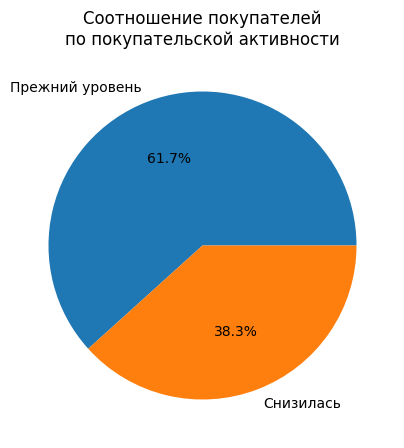

In [19]:
# построим круговую диаграмму
func_pie(series=market_file['Покупательская_активность'],
         name='Соотношение покупателей\nпо покупательской активности',
         size=5)  

**Вывод:**

- Покупательская активность снизилась у 38,3 % пользователей.
- Покупательская активность является целевым признаком моделей МО. На диаграмме наблюдаем дисбаланс классов, следовательно перед обучением моделей необходимо выполнить стратификацию по целевому признаку.

### Тип сервиса

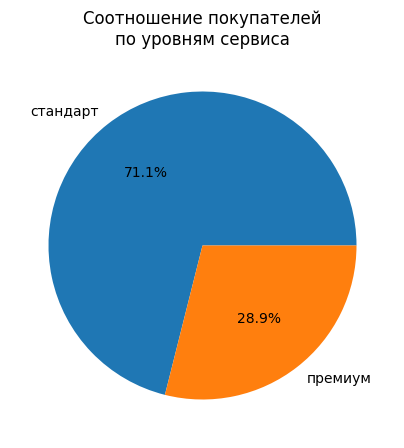

In [20]:
# построим круговую диаграмму
func_pie(series=market_file['Тип_сервиса'],
         name='Соотношение покупателей\nпо уровням сервиса',
         size=5)  

**Вывод:**

Премиум-клиентов: 28,9 %.

### Согласие на рекламу

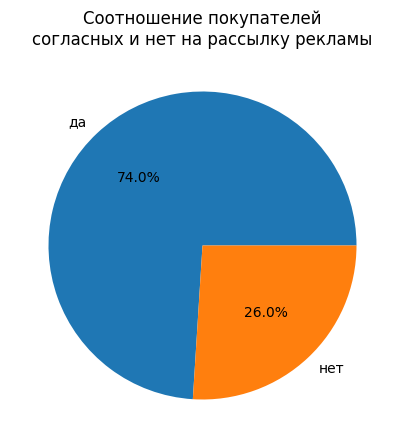

In [21]:
# построим круговую диаграмму
func_pie(series=market_file['Разрешить_сообщать'],
         name='Соотношение покупателей\nсогласных и нет на рассылку рекламы',
         size=5)  

**Вывод:**

Покупателей, не согласных на рассылку: 26 %.


### Самая популярная категория товаров

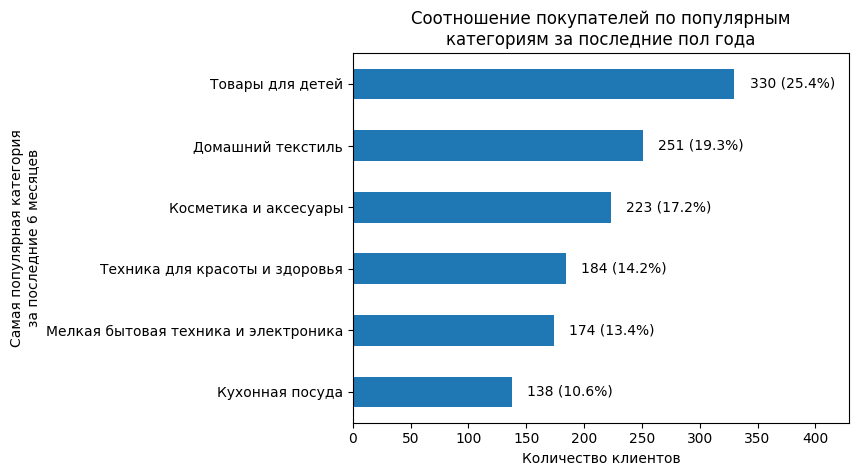

In [22]:
data=market_file['Популярная_категория'].value_counts().sort_values(ascending=True)
ax=data.plot(kind='barh', rot=0)

# подписываем и расставляем значения столбцов
for p in ax.patches:
    ax.annotate(
        (f'{p.get_width()} ({(p.get_width()/data.sum()*100).round(1)}%)'), 
                (p.get_x() + p.get_width() + 50, p.get_y() + p.get_height() * 0.5), 
                ha='center', 
                va='center')
    
# увеличиваем расстояние до края
plt.margins(0.3)

plt.title('Соотношение покупателей по популярным\nкатегориям за последние пол года')
plt.xlabel("Количество клиентов")
plt.ylabel("Самая популярная категория\nза последние 6 месяцев")
plt.show()

**Вывод:**

Самая популярная категория за последние пол года - Товары для детей (25,4 %), далее идут: Домашний текстиль (19,3 %), Косметика и аксесуары (17,2 %).

### Cреднемесячное значение маркетинговых коммуникаций на покупателя за последние 6 месяцев

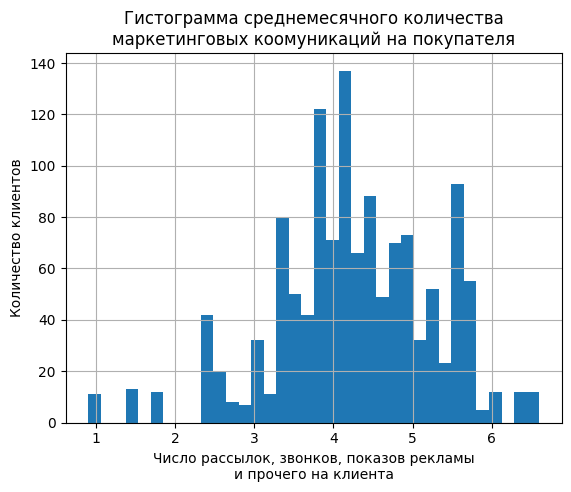

Основные описательные статистики:
count    1300.000000
mean        4.253769
std         1.014814
min         0.900000
25%         3.700000
50%         4.200000
75%         4.900000
max         6.600000
Name: Маркет_актив_6_мес, dtype: float64


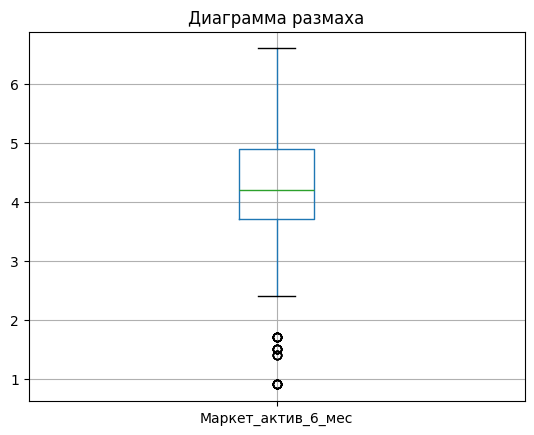

In [23]:
# построим гистограмму 
market_file['Маркет_актив_6_мес'].plot(
    kind='hist',
    grid=True,
    bins=36,
    title = 'Гистограмма среднемесячного количества\nмаркетинговых коомуникаций на покупателя')
plt.xlabel('Число рассылок, звонков, показов рекламы\nи прочего на клиента')
plt.ylabel('Количество клиентов')
plt.show()

# получим описательные статистики
print('Основные описательные статистики:')
print(market_file['Маркет_актив_6_мес'].describe())

# построим диаграмму размаха
market_file.boxplot(column='Маркет_актив_6_мес')
plt.title('Диаграмма размаха')
plt.show()

**Вывод:**

- Медианное значение среднемесячного количества маркетинговых коммуникаций за последние пол года: 4,2. 
- Имеются выбивающиеся значения, но выбросами их назвать нельзя. Распределение не является нормальным, на графике видны пики.

### Количество маркетинговых коммуникаций на покупателя в текущем месяце

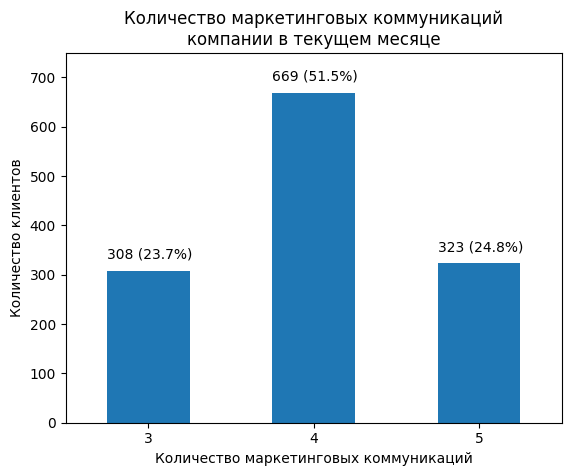

In [24]:
data=market_file['Маркет_актив_тек_мес'].value_counts().sort_index(ascending=True)
ax=data.plot(kind='bar', rot=0)

# подписываем и расставляем значения столбцов
for patch in ax.patches:
    ax.annotate(
        (f'{patch.get_height()} ({(patch.get_height()/data.sum()*100).round(1)}%)'),
        (patch.get_x(), patch.get_height()+25))
    
# увеличиваем расстояние до края
plt.margins(0.12)

plt.title('Количество маркетинговых коммуникаций\nкомпании в текущем месяце')
plt.xlabel("Количество маркетинговых коммуникаций")
plt.ylabel("Количество клиентов")
plt.show()

In [25]:
# вычислим среднее число маркетинговых коммуникаций
market_file['Маркет_актив_тек_мес'].median()

4.0

**Вывод:**

Более половины клиентов получили 4 рекламы за последний месяц. Медиана составляет 4, про том что за последние пол года это число 4,2. Получается, что количество маркетинговых коммуникаций в последнем месяце ниже, чем обычно.

### Время с момента регистрации покупателя на сайте

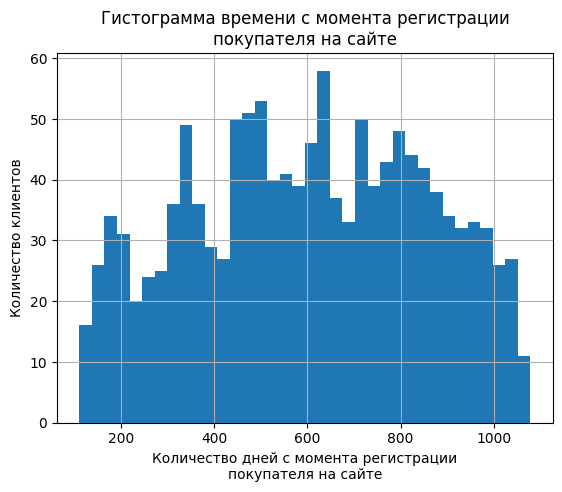

Основные описательные статистики:
count    1300.000000
mean      601.898462
std       249.856289
min       110.000000
25%       405.500000
50%       606.000000
75%       806.000000
max      1079.000000
Name: Длительность, dtype: float64


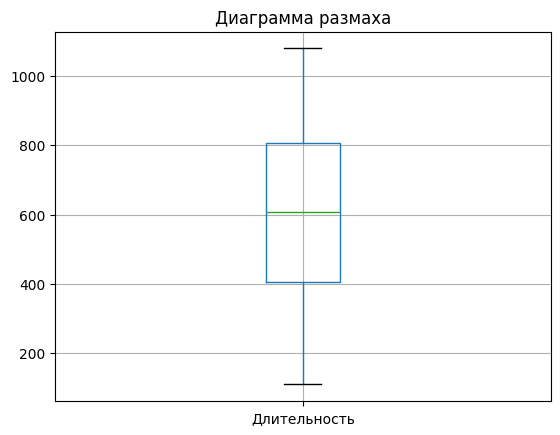

In [26]:
# построим гистограмму 
market_file['Длительность'].plot(
    kind='hist',
    grid=True,
    bins=36,
    title = 'Гистограмма времени с момента регистрации\nпокупателя на сайте')
plt.xlabel('Количество дней с момента регистрации\nпокупателя на сайте')
plt.ylabel('Количество клиентов')
plt.show()

# получим описательные статистики
print('Основные описательные статистики:')
print(market_file['Длительность'].describe())

# построим диаграмму размаха
plt.title('Диаграмма размаха')
market_file.boxplot(column='Длительность')
plt.show()

**Вывод:**

В среднем покупатели зарегистрированы на сайте около шестисот дней. Гистограмма имеет пики и распределение далеко от нормального. При этом выбросов и аномалий не наблюдается, данные выглядят корректно.  

### Среднее число категорий, которое покупатель просмотрел за визит за последний месяц

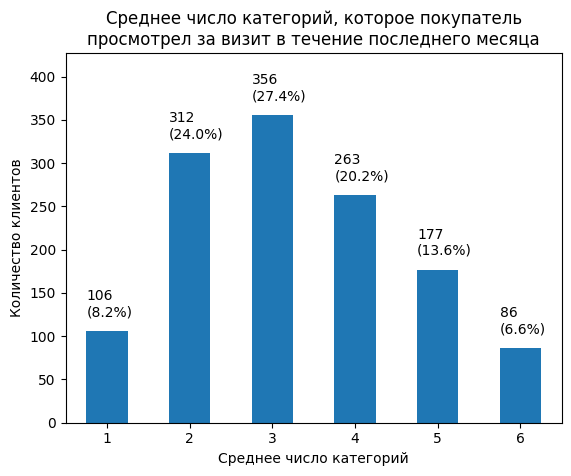

Основные описательные статистики:
count    1300.00000
mean        3.27000
std         1.35535
min         1.00000
25%         2.00000
50%         3.00000
75%         4.00000
max         6.00000
Name: Средний_просмотр_категорий_за_визит, dtype: float64


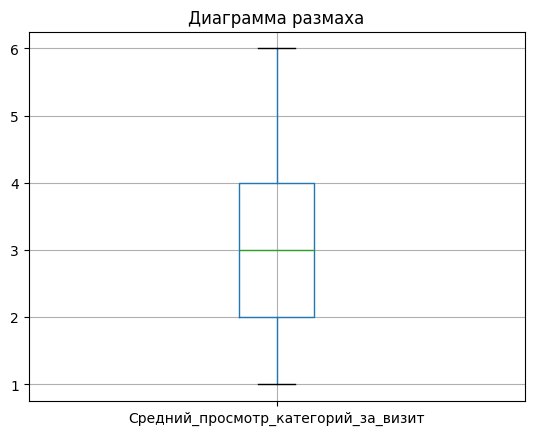

In [27]:
data=market_file['Средний_просмотр_категорий_за_визит'].value_counts().sort_index(ascending=True)
ax=data.plot(kind='bar', rot=0)

# подписываем и расставляем значения столбцов
for patch in ax.patches:
    ax.annotate(
        (f'{patch.get_height()}\n({(patch.get_height()/data.sum()*100).round(1)}%)'),
        (patch.get_x(), patch.get_height()+17))
    
# увеличиваем расстояние до края
plt.margins(0.2)

plt.title('Среднее число категорий, которое покупатель\nпросмотрел за визит в течение последнего месяца')
plt.xlabel("Среднее число категорий")
plt.ylabel("Количество клиентов")
plt.show()

# получим описательные статистики
print('Основные описательные статистики:')
print(market_file['Средний_просмотр_категорий_за_визит'].describe())

# построим диаграмму размаха
market_file.boxplot(column='Средний_просмотр_категорий_за_визит')
plt.title('Диаграмма размаха')
plt.show()

**Вывод:**

- Ожидаемо, что среднее число категорий - это непрерывная величина, но мы видим дискретную. Возможно данные округлены, требуется уточнение информации у заказчика.
- Диапизон среднего числа категорий от 1 до 6. Медианное значение: 3.
- Выбросов и аномалий не обнаружено.

### Общее число неоплаченных товаров в корзине за последние 3 месяца

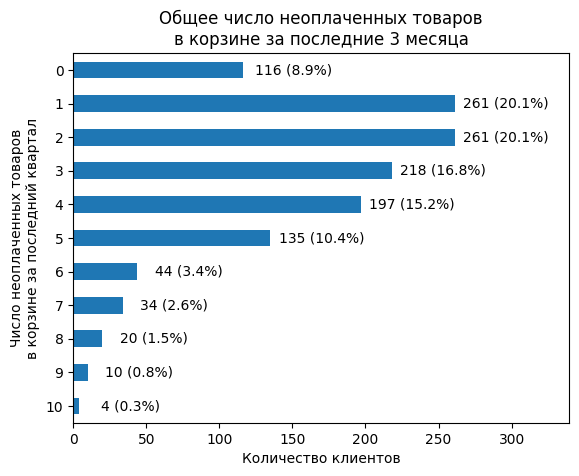

Основные описательные статистики:
count    1300.000000
mean        2.840000
std         1.971451
min         0.000000
25%         1.000000
50%         3.000000
75%         4.000000
max        10.000000
Name: Неоплаченные_продукты_штук_квартал, dtype: float64


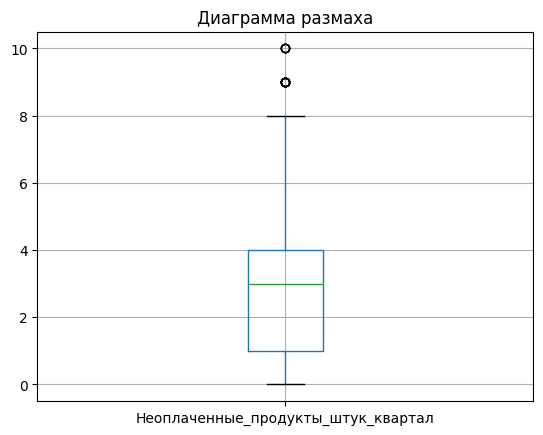

In [28]:
data=market_file['Неоплаченные_продукты_штук_квартал'].value_counts().sort_index(ascending=False)
ax=data.plot(kind='barh', rot=0)

# подписываем и расставляем значения столбцов
for p in ax.patches:
    ax.annotate(
        (f'{p.get_width()} ({(p.get_width()/data.sum()*100).round(1)}%)'), 
                (p.get_x() + p.get_width() + 35, p.get_y() + p.get_height() * 0.5), 
                ha='center', 
                va='center')
    
# увеличиваем расстояние до края
plt.margins(0.3)

plt.title('Общее число неоплаченных товаров\nв корзине за последние 3 месяца')
plt.xlabel("Количество клиентов")
plt.ylabel("Число неоплаченных товаров\nв корзине за последний квартал")
plt.show()

# получим описательные статистики
print('Основные описательные статистики:')
print(market_file['Неоплаченные_продукты_штук_квартал'].describe())

# построим диаграмму размаха
market_file.boxplot(column='Неоплаченные_продукты_штук_квартал')
plt.title('Диаграмма размаха')
plt.show()

**Вывод:**

- Число неоплаченных товаров в корзине за последний квартал лежит в диапазоне от 0 до 10 товаров, медианное значение: 3.
- Существенных выбросов не обнаружено, данные выглядят корректно.

### Число сбоев при посещении сайта

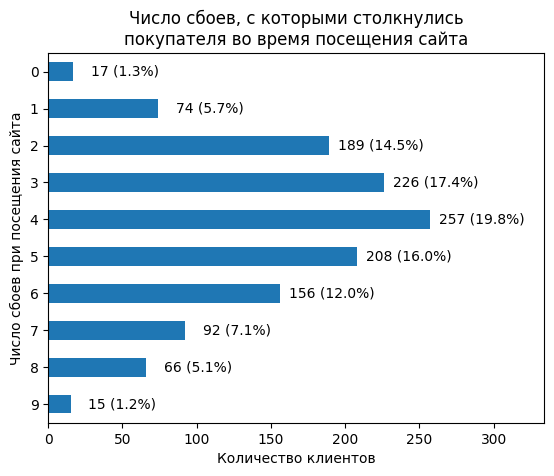

Основные описательные статистики:
count    1300.000000
mean        4.185385
std         1.955298
min         0.000000
25%         3.000000
50%         4.000000
75%         6.000000
max         9.000000
Name: Ошибка_сервиса, dtype: float64


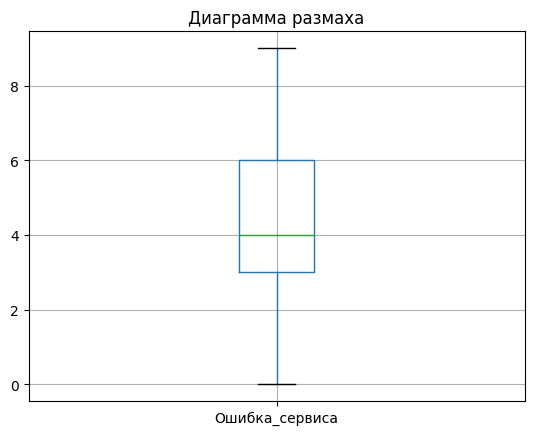

In [29]:
data=market_file['Ошибка_сервиса'].value_counts().sort_index(ascending=False)
ax=data.plot(kind='barh', rot=0)

# подписываем и расставляем значения столбцов
for p in ax.patches:
    ax.annotate(
        (f'{p.get_width()} ({(p.get_width()/data.sum()*100).round(1)}%)'), 
                (p.get_x() + p.get_width() + 35, p.get_y() + p.get_height() * 0.5), 
                ha='center', 
                va='center')
    
# увеличиваем расстояние до края
plt.margins(0.3)

plt.title('Число сбоев, c которыми столкнулись\nпокупателя во время посещения сайта')
plt.xlabel("Количество клиентов")
plt.ylabel("Число сбоев при посещения сайта")
plt.show()

# получим описательные статистики
print('Основные описательные статистики:')
print(market_file['Ошибка_сервиса'].describe())

# построим диаграмму размаха
market_file.boxplot(column='Ошибка_сервиса')
plt.title('Диаграмма размаха')
plt.show()

**Вывод:**

График имеет биномиальное распределение в диапазоне от 0 до 9. Медианное значение: 4. Выбросов и аномалий не обнаружено.

### Среднее количество страниц, которые просмотрел покупатель за один визит на сайт за последние 3 месяца

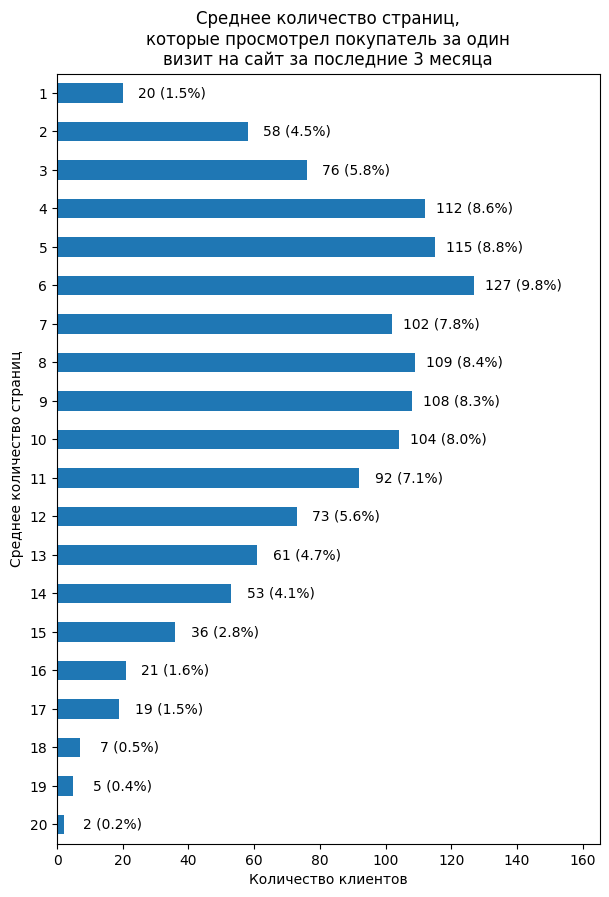

Основные описательные статистики:
count    1300.000000
mean        8.176923
std         3.978126
min         1.000000
25%         5.000000
50%         8.000000
75%        11.000000
max        20.000000
Name: Страниц_за_визит, dtype: float64


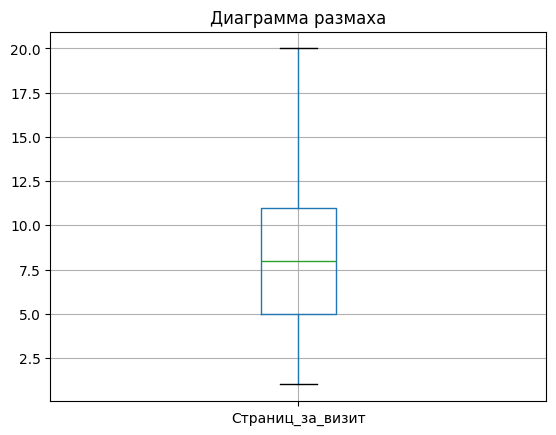

In [30]:
data=market_file['Страниц_за_визит'].value_counts().sort_index(ascending=False)
ax=data.plot(kind='barh', rot=0)

# подписываем и расставляем значения столбцов
for p in ax.patches:
    ax.annotate(
        (f'{p.get_width()} ({(p.get_width()/data.sum()*100).round(1)}%)'), 
                (p.get_x() + p.get_width() + 15, p.get_y() + p.get_height() * 0.5), 
                ha='center', 
                va='center')
    
# увеличиваем расстояние до края
plt.margins(0.3)

plt.title('Среднее количество страниц,\nкоторые просмотрел покупатель за один\nвизит на сайт за последние 3 месяца')
plt.xlabel("Количество клиентов")
plt.ylabel("Среднее количество страниц")
fig = plt.gcf()
fig.set_size_inches(7,10) 
plt.show()

# получим описательные статистики
print('Основные описательные статистики:')
print(market_file['Страниц_за_визит'].describe())

# построим диаграмму размаха
market_file.boxplot(column='Страниц_за_визит')
plt.title('Диаграмма размаха')
plt.show()

**Вывод:**

- Ожидаемо, что среднее число страниц - это непрерывная величина, но мы видим дискретную. Возможно данные округлены, требуется уточнение информации у заказчика.
- Диапизон среднего числа категорий от 1 до 20. Медианное значение: 8.
- Выбросов и аномалий не обнаружено.

### Выручка с каждого покупателя

**Название периода, во время которого зафиксирована выручка**

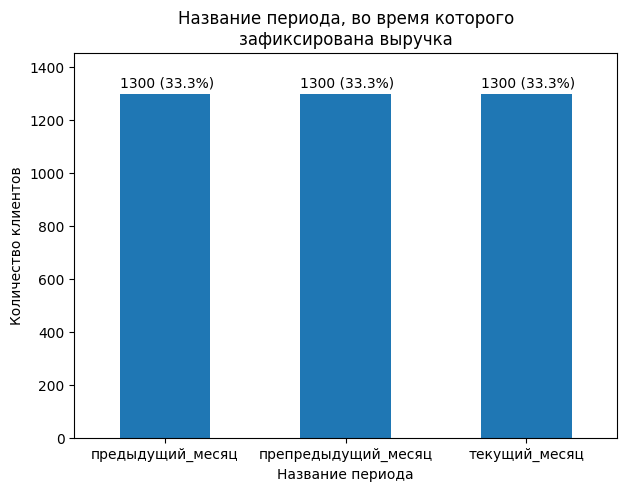

In [31]:
data=market_money['Период'].value_counts().sort_index(ascending=True)
ax=data.plot(kind='bar', rot=0)

# подписываем и расставляем значения столбцов
for patch in ax.patches:
    ax.annotate(
        (f'{patch.get_height()} ({(patch.get_height()/data.sum()*100).round(1)}%)'),
        (patch.get_x(), patch.get_height()+25))
    
# увеличиваем расстояние до края
plt.margins(0.12)

plt.title('Название периода, во время которого\nзафиксирована выручка')
plt.xlabel("Название периода")
plt.ylabel("Количество клиентов")

# настраиваем размер графика
fig = plt.gcf()
fig.set_size_inches(7,5) 

plt.show()

**Сумма выручки за период с каждого покупателя**

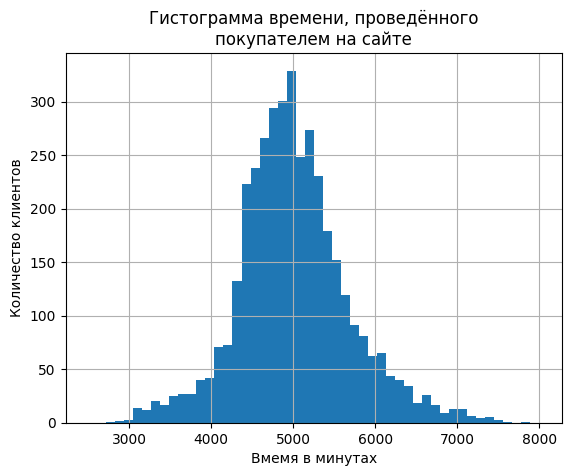

Основные описательные статистики:
count      3900.000000
mean       5025.696051
std        1777.704104
min           0.000000
25%        4590.150000
50%        4957.500000
75%        5363.000000
max      106862.200000
Name: Выручка, dtype: float64


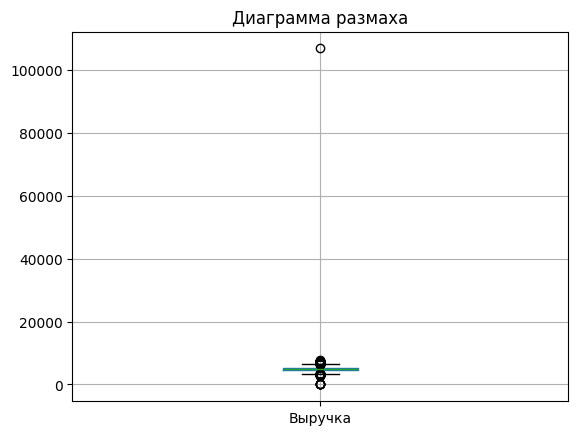

In [32]:
# построим гистограмму 
market_money['Выручка'].plot(
    kind='hist',
    grid=True,
    range=(2500, 8000),
    bins=50,
    title = 'Гистограмма времени, проведённого\nпокупателем на сайте')
plt.xlabel('Вмемя в минутах')
plt.ylabel('Количество клиентов')
plt.show()

# получим описательные статистики
print('Основные описательные статистики:')
print(market_money['Выручка'].describe())

# построим диаграмму размаха
plt.title('Диаграмма размаха')
market_money.boxplot(column='Выручка')
plt.show()

Диаграмма размаха показывает существенные выбросы. Изменим интервал отображения.

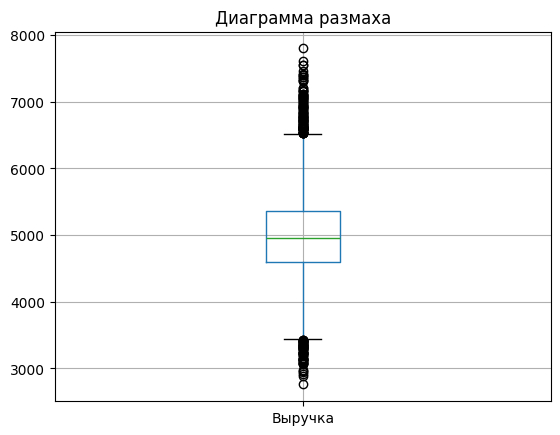

In [33]:
# построим диаграмму размаха
plt.title('Диаграмма размаха')
market_money.query('0 < Выручка < 100000').boxplot(column='Выручка')

plt.show()

Заменим максимальное значение (самый заметный выброс) медианным.

In [34]:
market_money.loc[market_money['Выручка'] > 100000, 'Выручка'] = market_money['Выручка'].median()

In [35]:
# проверим обновленные статистики
market_money['Выручка'].describe()

count    3900.000000
mean     4999.566641
std       706.909531
min         0.000000
25%      4590.150000
50%      4957.250000
75%      5363.000000
max      7799.400000
Name: Выручка, dtype: float64

In [36]:
# выведем общую информацию
market_money.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       3900 non-null   int64  
 1   Период   3900 non-null   object 
 2   Выручка  3900 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 91.5+ KB


Выброс удалён, данные готовы для дальнейшей работы.

**Сформируем сводную таблицу с выручкой по месяцам для активных покупателей.**

In [37]:
market_money_pivot = pd.pivot_table(market_money.query('Выручка > 0'), 
                                    index='id', 
                                    columns='Период', 
                                    values='Выручка')
market_money_pivot

Период,предыдущий_месяц,препредыдущий_месяц,текущий_месяц
id,,,
215348,NaN,NaN,3293.1
215349,5216.0,4472.0,4971.6
215350,5457.5,4826.0,5058.4
215351,6158.0,4793.0,6610.4
215352,5807.5,4594.0,5872.5
...,...,...,...
216643,3664.0,4704.0,4741.7
216644,4729.0,5299.0,5353.0
216645,5160.0,5334.0,5139.2


**Вывод:**

- Данные о выручке представлены тремя периодами по месяцу с равним числом клиентов в каждом месяце.
- Распределение выручки в целом похоже на нормальное, но имеется два пика в раойне медианы. Медианное значение 4957,25.
- В данных есть значительное число выбросов, что естественно, поскольку есть редкие клиенты с крупными покупками, а так же клиенты, которые за последний квартал ничего не купили и выручка от них равна нулю. Самый заметный выброс заменили медианой.

### Время, которое покупатель провёл на сайте в течение периода

**Название периода, во время которого зафиксировано общее время**

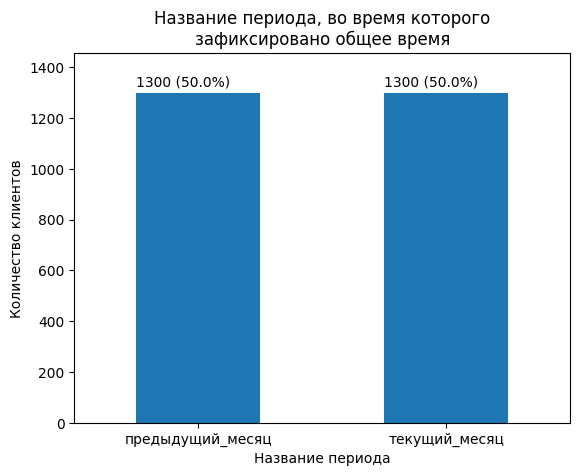

In [38]:
data=market_time['Период'].value_counts().sort_index(ascending=True)
ax=data.plot(kind='bar', rot=0)

# подписываем и расставляем значения столбцов
for patch in ax.patches:
    ax.annotate(
        (f'{patch.get_height()} ({(patch.get_height()/data.sum()*100).round(1)}%)'),
        (patch.get_x(), patch.get_height()+25))
    
# увеличиваем расстояние до края
plt.margins(0.12)

plt.title('Название периода, во время которого\nзафиксировано общее время')
plt.xlabel("Название периода")
plt.ylabel("Количество клиентов")
plt.show()

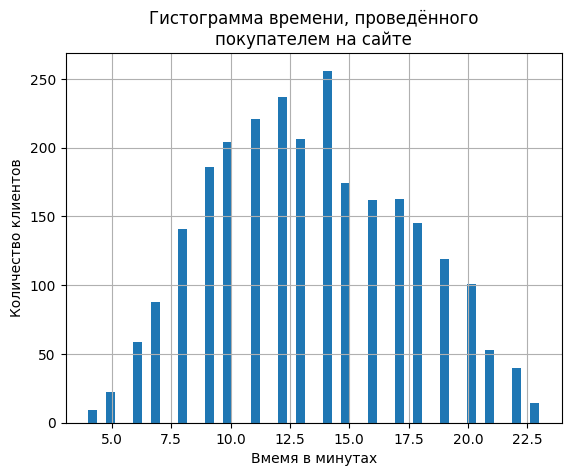

Основные описательные статистики:
count    2600.000000
mean       13.336154
std         4.080198
min         4.000000
25%        10.000000
50%        13.000000
75%        16.000000
max        23.000000
Name: Минут, dtype: float64


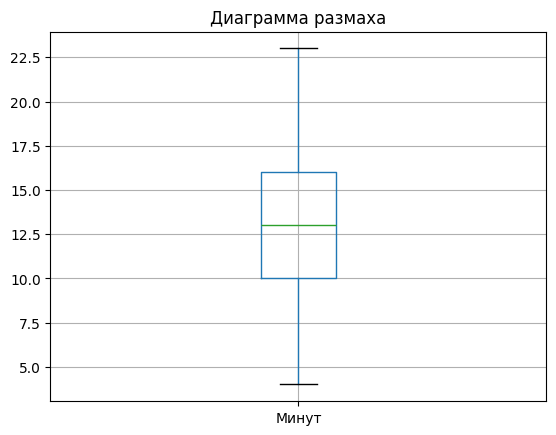

In [39]:
# построим гистограмму 
market_time['Минут'].plot(
    kind='hist',
    grid=True,
    bins=50,
    title = 'Гистограмма времени, проведённого\nпокупателем на сайте')
plt.xlabel('Вмемя в минутах')
plt.ylabel('Количество клиентов')
plt.show()

# получим описательные статистики
print('Основные описательные статистики:')
print(market_time['Минут'].describe())

# построим диаграмму размаха
plt.title('Диаграмма размаха')
market_time.boxplot(column='Минут')
plt.show()

**Вывод:**

- Данные о времени представлены двумя периодами: предыдущий месяц и текущий месяц. Количество значений равное.
- Распределение времени, проведенного на сайтах близко к нормальному. Среднее вмемя: 13,33 минуты.
- Выбросов не обнаружено, данные выглядят корректно.

**Сформируем сводную таблицу со временем, проведенным каждым покупателем на сайте.**

In [40]:
market_time_pivot = pd.pivot_table(market_time, 
                                    index='id', 
                                    columns='Период', 
                                    values='Минут')
market_time_pivot

Период,предыдущий_месяц,текущий_месяц
id,,
215348,13,14
215349,12,10
215350,8,13
215351,11,13
215352,8,11
...,...,...
216643,14,7
216644,12,11
216645,12,18


In [41]:
# выведем информацию об итоговой таблице
market_time_pivot.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1300 entries, 215348 to 216647
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   предыдущий_месяц  1300 non-null   int64
 1   текущий_месяц     1300 non-null   int64
dtypes: int64(2)
memory usage: 30.5 KB


**Вывод:**

Таблица со временем, проведенным покупателями на сайте сформирована, данные корректны.

### Среднемесячная прибыль от каждого покупателя за последний квартал

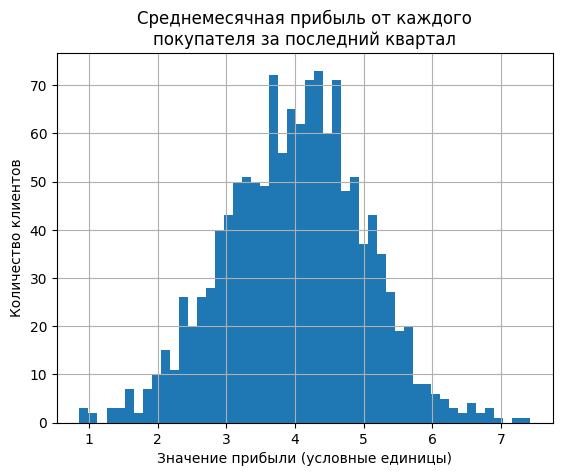

Основные описательные статистики:
count    1300.000000
mean        3.996631
std         1.013722
min         0.860000
25%         3.300000
50%         4.045000
75%         4.670000
max         7.430000
Name: Прибыль, dtype: float64


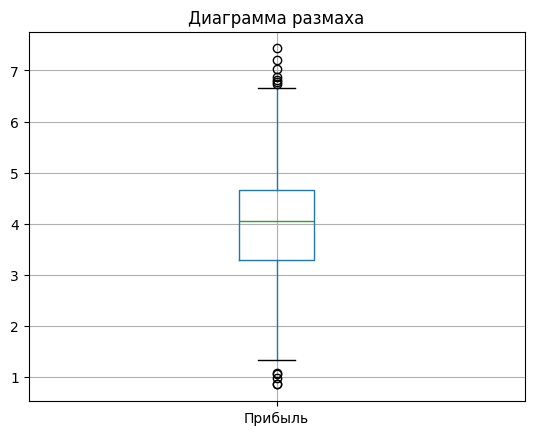

In [42]:
# построим гистограмму 
money['Прибыль'].plot(
    kind='hist',
    grid=True,
    bins=50,
    title = 'Среднемесячная прибыль от каждого\nпокупателя за последний квартал')
plt.xlabel('Значение прибыли (условные единицы)')
plt.ylabel('Количество клиентов')
plt.show()

# получим описательные статистики
print('Основные описательные статистики:')
print(money['Прибыль'].describe())

# построим диаграмму размаха
plt.title('Диаграмма размаха')
money.boxplot(column='Прибыль')
plt.show()

**Вывод:**

- Распределение средней прибыли от клиента за последний квартал имеет форму, близкую к нормальному, но имеет нехарактерные пики в районе средних значений
- Данные представлены только клиентами, прибыль от которых за последние 3 месяца не равна нулю.
- Имеются несущественные выбросы, данные выглядят корректно.

**Итог:**


Исследовательский анализ завершен.Данные выглядят корректными и готовыми для построения моделей МО, отметим следующее:
- В данных по выручке обнаружены многочисленные выбросы, они являются естественными для таких данных. Один самый серьезный выброс заменили медианным значением, остальные являются менее существенными, их оставили.

## Объединение таблиц

Объединим датафреймы `market_file`, `market_money_pivot`, `market_time_pivot`. 

Выведем первые строки таблиц и размеры.

In [43]:
market_file.head()

,id,Покупательская_активность,Тип_сервиса,Разрешить_сообщать,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Популярная_категория,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит
0,215348,Снизилась,премиум,да,3.4,5,121,0.00,Товары для детей,6,2,1,5
1,215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5
2,215350,Снизилась,стандарт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5
3,215351,Снизилась,стандарт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4
4,215352,Снизилась,стандарт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2


In [44]:
# делаем столбец 'id' индексом датафрейма
market_file = market_file.set_index('id')

In [45]:
market_file.head()

,Покупательская_активность,Тип_сервиса,Разрешить_сообщать,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Популярная_категория,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит
id,,,,,,,,,,,,
215348,Снизилась,премиум,да,3.4,5,121,0.00,Товары для детей,6,2,1,5
215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5
215350,Снизилась,стандарт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5
215351,Снизилась,стандарт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4
215352,Снизилась,стандарт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2


In [46]:
market_file.shape

(1300, 12)

In [47]:
market_money_pivot.head()

Период,предыдущий_месяц,препредыдущий_месяц,текущий_месяц
id,,,
215348,NaN,NaN,3293.1
215349,5216.0,4472.0,4971.6
215350,5457.5,4826.0,5058.4
215351,6158.0,4793.0,6610.4
215352,5807.5,4594.0,5872.5


In [48]:
market_money_pivot.shape

(1300, 3)

In [49]:
market_time_pivot.head()

Период,предыдущий_месяц,текущий_месяц
id,,
215348,13,14
215349,12,10
215350,8,13
215351,11,13
215352,8,11


In [50]:
market_time_pivot.shape

(1300, 2)

In [51]:
# объединим датафреймы market_file и market_money_pivot 
# должен получиться дадафрейм с 15 столбцами и, желательно, 1300 строками
df = market_file.join(market_money_pivot, how='inner')

# выведем первые строки
df.head()

,Покупательская_активность,Тип_сервиса,Разрешить_сообщать,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Популярная_категория,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит,предыдущий_месяц,препредыдущий_месяц,текущий_месяц
id,,,,,,,,,,,,,,,
215348,Снизилась,премиум,да,3.4,5,121,0.00,Товары для детей,6,2,1,5,NaN,NaN,3293.1
215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5,5216.0,4472.0,4971.6
215350,Снизилась,стандарт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5,5457.5,4826.0,5058.4
215351,Снизилась,стандарт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4,6158.0,4793.0,6610.4
215352,Снизилась,стандарт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2,5807.5,4594.0,5872.5


In [52]:
# выведем размеры получившегося датафрейма
print(df.shape)

(1300, 15)


In [53]:
# изменим названия новых столбцов
df = df.rename(
    columns={
        'предыдущий_месяц':    'Выручка_пред_мес',
        'препредыдущий_месяц': 'Выручка_препред_мес',              
        'текущий_месяц':       'Выручка_тек_мес',
    }
)

# выведем первые строки
df.head()

,Покупательская_активность,Тип_сервиса,Разрешить_сообщать,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Популярная_категория,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит,Выручка_пред_мес,Выручка_препред_мес,Выручка_тек_мес
id,,,,,,,,,,,,,,,
215348,Снизилась,премиум,да,3.4,5,121,0.00,Товары для детей,6,2,1,5,NaN,NaN,3293.1
215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5,5216.0,4472.0,4971.6
215350,Снизилась,стандарт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5,5457.5,4826.0,5058.4
215351,Снизилась,стандарт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4,6158.0,4793.0,6610.4
215352,Снизилась,стандарт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2,5807.5,4594.0,5872.5


In [54]:
# добавим к получившемуся датафрейму market_time_pivot 
# должен получиться датафрейм с 17 столбцами и, желательно, 1300 строками
df = df.join(market_time_pivot, how='inner')

# выведем первые строки
df.head()

,Покупательская_активность,Тип_сервиса,Разрешить_сообщать,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Популярная_категория,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит,Выручка_пред_мес,Выручка_препред_мес,Выручка_тек_мес,предыдущий_месяц,текущий_месяц
id,,,,,,,,,,,,,,,,,
215348,Снизилась,премиум,да,3.4,5,121,0.00,Товары для детей,6,2,1,5,NaN,NaN,3293.1,13,14
215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5,5216.0,4472.0,4971.6,12,10
215350,Снизилась,стандарт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5,5457.5,4826.0,5058.4,8,13
215351,Снизилась,стандарт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4,6158.0,4793.0,6610.4,11,13
215352,Снизилась,стандарт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2,5807.5,4594.0,5872.5,8,11


In [55]:
# выведем размеры получившегося датафрейма
print(df.shape)

(1300, 17)


In [56]:
# изменим названия новых столбцов
df = df.rename(
    columns={
        'предыдущий_месяц':    'Минут_пред_мес',            
        'текущий_месяц':       'Минут_тек_мес',
    }
)

# выведем первые строки
df.head()

,Покупательская_активность,Тип_сервиса,Разрешить_сообщать,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Популярная_категория,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит,Выручка_пред_мес,Выручка_препред_мес,Выручка_тек_мес,Минут_пред_мес,Минут_тек_мес
id,,,,,,,,,,,,,,,,,
215348,Снизилась,премиум,да,3.4,5,121,0.00,Товары для детей,6,2,1,5,NaN,NaN,3293.1,13,14
215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5,5216.0,4472.0,4971.6,12,10
215350,Снизилась,стандарт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5,5457.5,4826.0,5058.4,8,13
215351,Снизилась,стандарт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4,6158.0,4793.0,6610.4,11,13
215352,Снизилась,стандарт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2,5807.5,4594.0,5872.5,8,11


In [57]:
# выведем общую информацию о результирующем датафрейме
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1300 entries, 215348 to 216647
Data columns (total 17 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Покупательская_активность            1300 non-null   object 
 1   Тип_сервиса                          1300 non-null   object 
 2   Разрешить_сообщать                   1300 non-null   object 
 3   Маркет_актив_6_мес                   1300 non-null   float64
 4   Маркет_актив_тек_мес                 1300 non-null   int64  
 5   Длительность                         1300 non-null   int64  
 6   Акционные_покупки                    1300 non-null   float64
 7   Популярная_категория                 1300 non-null   object 
 8   Средний_просмотр_категорий_за_визит  1300 non-null   int64  
 9   Неоплаченные_продукты_штук_квартал   1300 non-null   int64  
 10  Ошибка_сервиса                       1300 non-null   int64  
 11  Страниц_за_визит       

In [58]:
# число пропусков
df.isna().sum().sum()

6

Есть пропуски, выведем строки с пропусками.

In [59]:
# выводим строки с пропусками
df[df.isna().any(axis=1)]

,Покупательская_активность,Тип_сервиса,Разрешить_сообщать,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Популярная_категория,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит,Выручка_пред_мес,Выручка_препред_мес,Выручка_тек_мес,Минут_пред_мес,Минут_тек_мес
id,,,,,,,,,,,,,,,,,
215348,Снизилась,премиум,да,3.4,5,121,0.0,Товары для детей,6,2,1,5,NaN,NaN,3293.1,13,14
215357,Снизилась,стандарт,да,3.9,5,154,0.0,Техника для красоты и здоровья,3,3,9,5,NaN,NaN,5986.3,12,6
215359,Снизилась,стандарт,да,4.6,5,110,0.0,Домашний текстиль,4,2,4,2,NaN,NaN,4735.0,13,11


В строках отсутствует выручка за предыдущие месяцы, но есть в текущем. Оставим только тех покупателей, которые проявляли активность все 3 месяца. Удалим строки с пропусками.

In [60]:
# удаляем строки с пропусками
df = df.dropna()

In [61]:
# выведем общую информацию о результирующем датафрейме
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1297 entries, 215349 to 216647
Data columns (total 17 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Покупательская_активность            1297 non-null   object 
 1   Тип_сервиса                          1297 non-null   object 
 2   Разрешить_сообщать                   1297 non-null   object 
 3   Маркет_актив_6_мес                   1297 non-null   float64
 4   Маркет_актив_тек_мес                 1297 non-null   int64  
 5   Длительность                         1297 non-null   int64  
 6   Акционные_покупки                    1297 non-null   float64
 7   Популярная_категория                 1297 non-null   object 
 8   Средний_просмотр_категорий_за_визит  1297 non-null   int64  
 9   Неоплаченные_продукты_штук_квартал   1297 non-null   int64  
 10  Ошибка_сервиса                       1297 non-null   int64  
 11  Страниц_за_визит       

**Итог:**

Данные датафреймов `market_file`, `market_money_pivot`, `market_time_pivot` успешно объединены в датафрейм `df`. Пропуски удалены, ошибок не обнаружено. Данные готовы для дальнейшей работы.

## Корреляционный анализ

- Проведем корреляционный анализ признаков в количественной шкале в итоговой таблице для моделирования (датафрейм `df`). 
- Сделаем выводы о мультиколлинеарности и при необходимости устраним её.

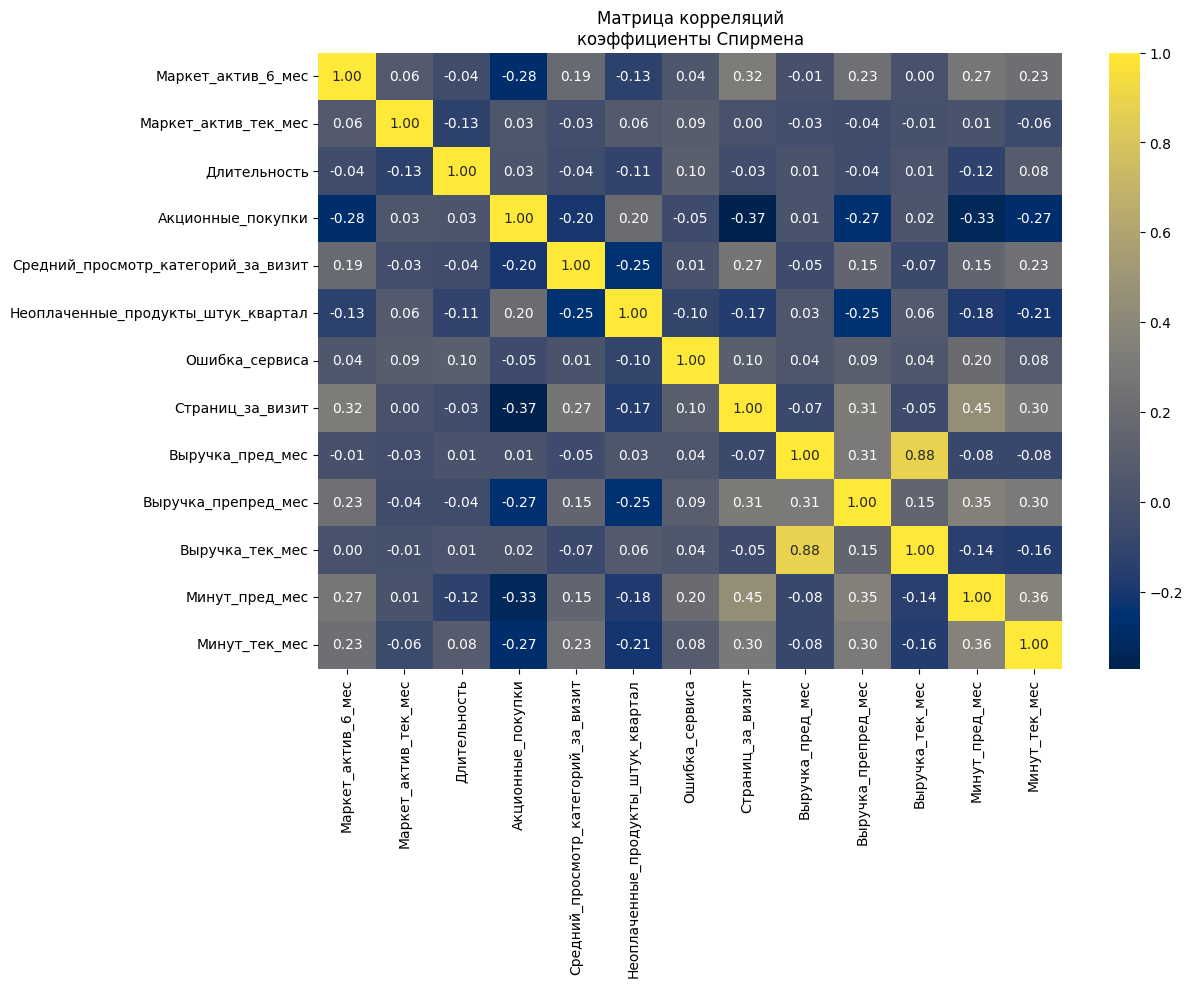

In [62]:
plt.figure(figsize = (12,8))
ax = plt.axes()
sns.heatmap(df.corr(method='spearman', numeric_only = True), 
            annot=True, 
            fmt='.2f',
            cmap='cividis',
            ax=ax)
ax.set_title('Матрица корреляций\nкоэффициенты Спирмена')
plt.show()

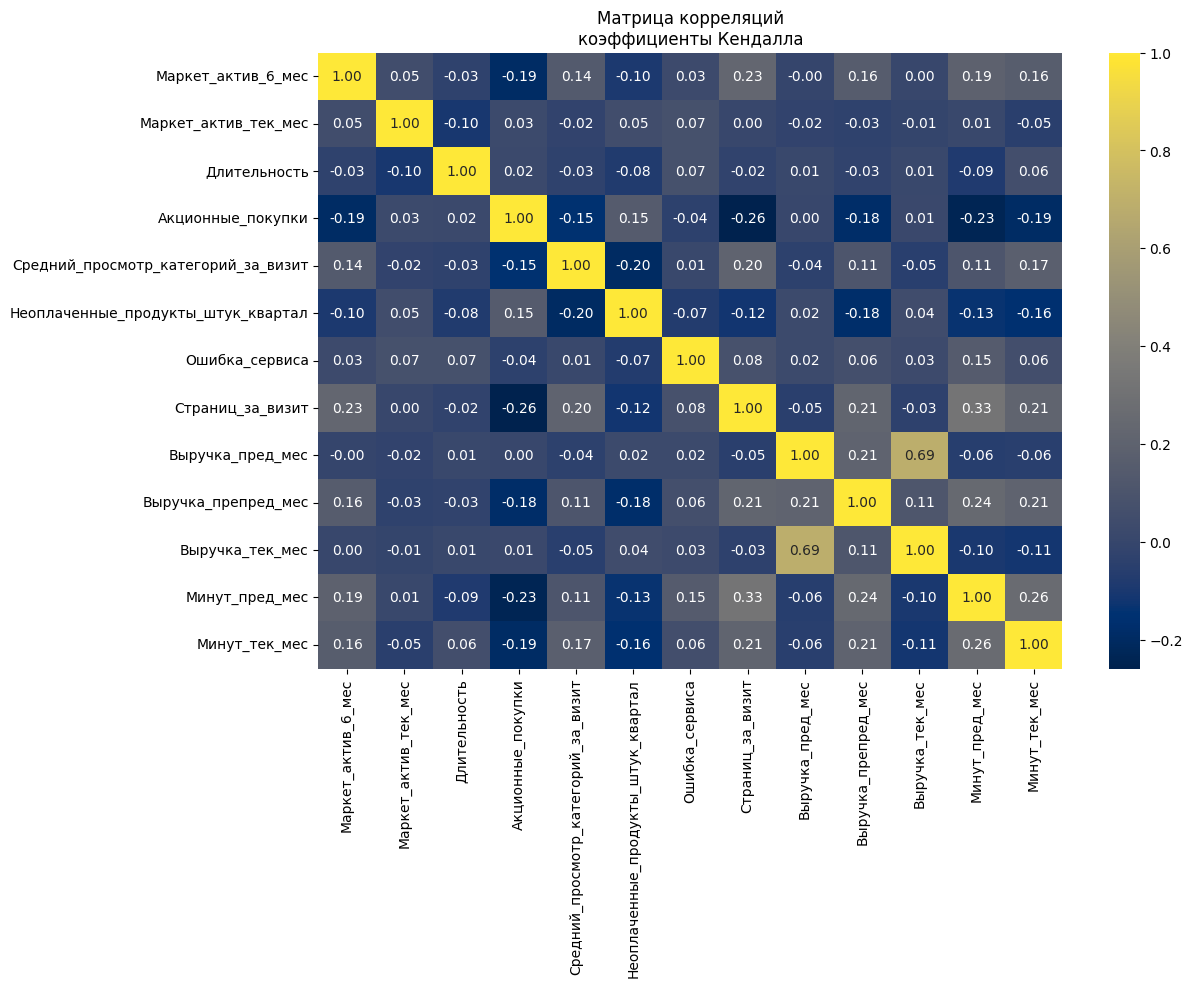

In [63]:
plt.figure(figsize = (12,8))
ax = plt.axes()
sns.heatmap(df.corr(method='kendall', numeric_only = True), 
            annot=True, 
            fmt='.2f',
            cmap='cividis',
            ax=ax)
ax.set_title('Матрица корреляций\nкоэффициенты Кендалла')
plt.show()

**Вывод:**

- Корреляции между признаками в основном незначительны.
- Выделяется корреляция между выручкой в текущем месяце и выручкой в предыдщущем месяце. Коэффициенты корреляции относительно высокие (0,88 по Спирмену и 0,69 по Кендаллу), но недостаточны, чтобы предположить наличие мультиколлинеарности. 
- Мультиколлинеарность маловероятна, данные готовы к моделированию.

## Обучение моделей МО

1. Подготовим данные и обучим 4 модели:
- **KNeighborsClassifier**;
- **DecisionTreeClassifier**;
- **LogisticRegression**;
- **SVC**.
2. Для каждой из моделей подберем как минимум 1 гиперпараметр.
3. Выберем лучшую модель, используя заданную метрику.

**Целевой признак:** 
`покупательская активность`. Необходимо предсказать снижение покупательской активности в следующие 3 месяца.

- Для выбора лучшей модели будем считать метрику ROC-AUC. Она отлично подходит для бинарной классификации с несбалансированной выборкой. ROC-AUC оценивает качество решений модели в наиболее общем виде, учитывая все возможные пороговые значения. 

- Поскольку классы в целевом признаке распределены неравномерно (см. Исследовательский анализ), то перед обучением моделей необходимо выполнить стратификацию.

In [64]:
# игнорируем предупреждения
warnings.filterwarnings('ignore')

## делим данные на тренировочные и тестовые----------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    df.drop('Покупательская_активность', axis=1),
    df['Покупательская_активность'],
    test_size = TEST_SIZE, 
    random_state = RANDOM_STATE,
    stratify = df['Покупательская_активность'])

X_train.shape, X_test.shape, y_train.shape, y_test.shape

## создаём списки с названиями признаков-------------------------------------
# категориальные номинальные признаки
ohe_columns = [
    'Разрешить_сообщать',
    'Популярная_категория',
]

# категориальные ранговые признаки
ord_columns = ['Тип_сервиса']

# количественные признаки
num_columns = [
    'Маркет_актив_6_мес',
    'Маркет_актив_тек_мес',
    'Длительность',
    'Акционные_покупки',
    'Средний_просмотр_категорий_за_визит',
    'Неоплаченные_продукты_штук_квартал',
    'Ошибка_сервиса',
    'Страниц_за_визит',
    'Выручка_пред_мес',
    'Выручка_препред_мес',
    'Выручка_тек_мес',
    'Минут_пред_мес',
    'Минут_тек_мес'
]

## создаем пайплайны---------------------------------------------------------
# создаём пайплайн для подготовки признаков из списка ohe_columns: 
# заполнение пропусков и OHE-кодирование SimpleImputer + OHE
ohe_pipe = Pipeline(
    [
        (
            'simpleImputer_ohe', 
            SimpleImputer(missing_values=np.nan, strategy='most_frequent')
        ),
        (
            'ohe', 
            OneHotEncoder(drop='first', handle_unknown='error', sparse_output=False)
        )
    ]
)

# создаём пайплайн для подготовки признаков из списка ord_columns: заполнение пропусков и Ordinal-кодирование
# SimpleImputer + OE
ord_pipe = Pipeline(
    [('simpleImputer_before_ord', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
     ('ord',  OrdinalEncoder(
                categories=[
                    ['стандарт', 'премиум'], 
                ], 
                handle_unknown='use_encoded_value', unknown_value=np.nan
            )
        ),
     ('simpleImputer_after_ord', SimpleImputer(missing_values=np.nan, strategy='most_frequent'))
    ]
)

# создаём общий пайплайн для подготовки данных
data_preprocessor = ColumnTransformer(
    [
        ('ohe', ohe_pipe, ohe_columns),
        ('ord', ord_pipe, ord_columns),
        ('num', MinMaxScaler(), num_columns)
    ], 
    remainder='passthrough'
)

# создаём итоговый пайплайн: подготовка данных и модель
pipe_final = Pipeline([
    ('preprocessor', data_preprocessor),
    ('models', DecisionTreeClassifier(random_state=RANDOM_STATE))
])

# перебираем гиперпараметры моделей
param_grid = [
    
    # словарь для модели KNeighborsClassifier() 
    {
        'models': [KNeighborsClassifier()],
        'models__n_neighbors': range(2, 5),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']
        #'preprocessor__ohe': [OneHotEncoder(), OrdinalEncoder(), 'passthrough']
    },
           
    # словарь для модели DecisionTreeClassifier()
    {
        'models': [DecisionTreeClassifier(random_state=RANDOM_STATE)],
        'models__max_depth': range(2, 5),
        'models__max_features': range(2, 5),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']  
    },
    
    # словарь для модели LogisticRegression()
    {
        'models': [LogisticRegression(
            random_state=RANDOM_STATE, 
            solver='liblinear', 
            penalty='l1'
        )],
        'models__C': range(1, 5),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']  
    },
    
    # словарь для модели SVC()
    {
        'models': [SVC(random_state=RANDOM_STATE, probability=True)],
        'models__C':[0.1,1,10],
        'models__kernel':['linear'],
        'models__degree':[2],
        'models__gamma':[0.1,1,10],
        'preprocessor__num': [OneHotEncoder(), MinMaxScaler(), 'passthrough']  

    },
]

randomized_search = RandomizedSearchCV(
    pipe_final, 
    param_grid,
    cv=5,
    scoring='roc_auc',
    random_state=RANDOM_STATE,
    n_jobs=-1
)
randomized_search.fit(X_train, y_train)

print('Лучшая модель и её параметры:\n\n', randomized_search.best_estimator_)
print ('Метрика ROC-AUC лучшей модели на тренировочной выборке:', randomized_search.best_score_)

Лучшая модель и её параметры:

 Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  Pipeline(steps=[('simpleImputer_ohe',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 sparse_output=False))]),
                                                  ['Разрешить_сообщать',
                                                   'Популярная_категория']),
                                                 ('ord',
                                                  Pipeline(steps=[('simpleImputer_before_ord',
                                            

In [65]:
# расчет прогноза на тестовых данных
y_test_pred = randomized_search.predict(X_test)

In [66]:
# расчет метрики на тестовой выборке
y_test_pred_prob = randomized_search.predict_proba(X_test)
print('Метрика ROC-AUC лучшей модели на тестовой выборке:', accuracy_score(y_test, y_test_pred))

Метрика ROC-AUC лучшей модели на тестовой выборке: 0.9107692307692308


**Вывод:**

- Лучшая модель найдена: SVC(C=0.1, degree=2, gamma=0.001, kernel='linear').
- Метрика ROC-AUC лучшей модели на тренировочной и тестовой выборке соответственно: 0.89 и 0,91.

## Анализ важности признаков

Оценим важность признаков для лучшей модели и построим график важности с помощью метода SHAP. 

In [67]:
# делаем обработку данных train
x_Train = pipe_final.named_steps['preprocessor'].fit_transform(X_train)

# задаем объект shap.Explainer()
explainer = shap.Explainer(randomized_search.best_estimator_.named_steps['models'], x_Train)

# делаем обработку данных test
x_Test = pipe_final.named_steps['preprocessor'].transform(X_test)

feature_names = pipe_final.named_steps['preprocessor'].get_feature_names_out(input_features=None)

x_Test = pd.DataFrame(x_Test, columns=feature_names)

# объясняем переменные
shap_values = explainer(x_Test)

**График общей значимости признаков**

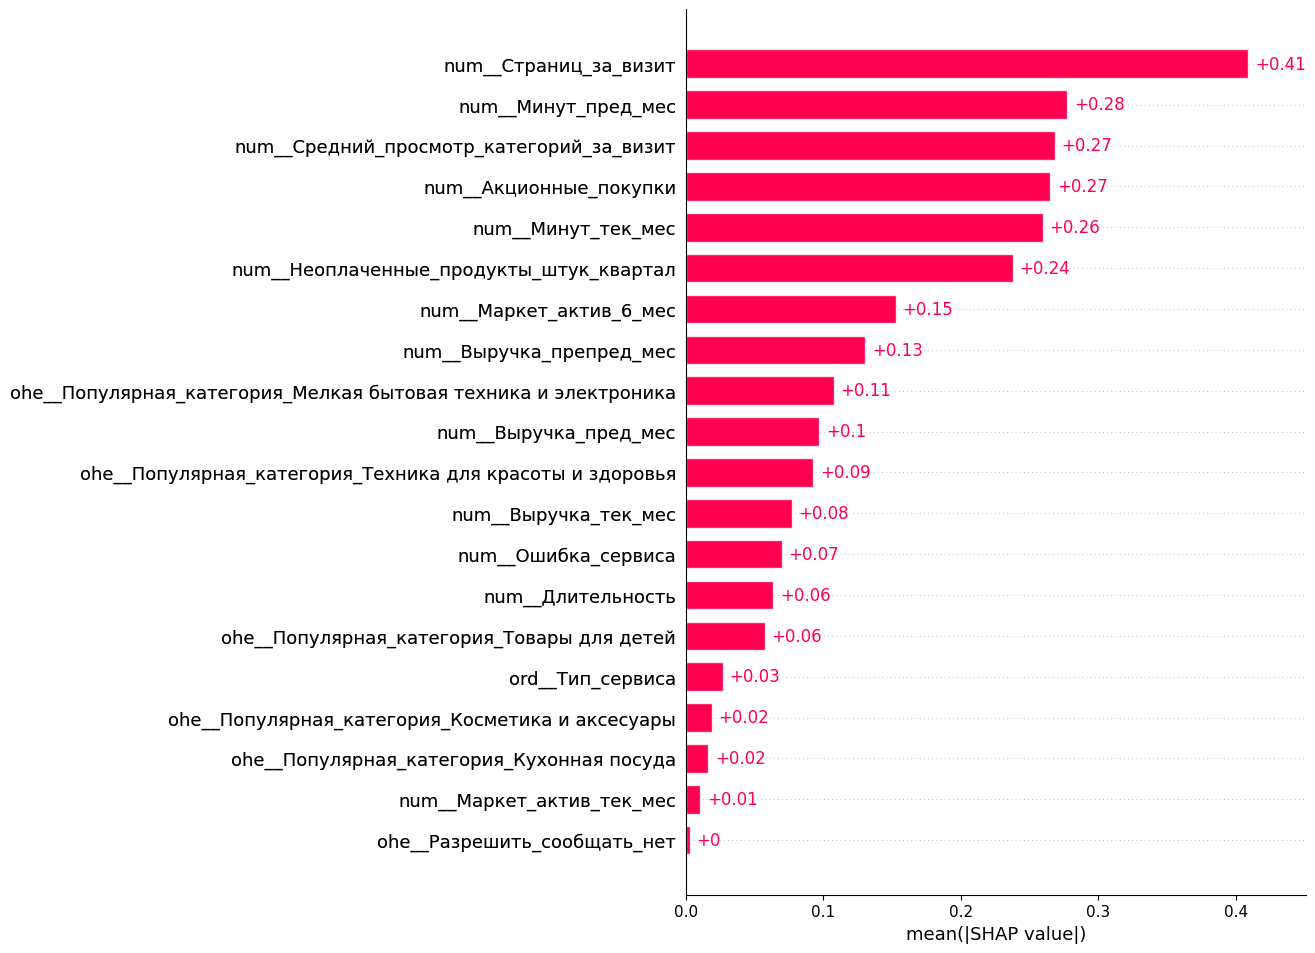

In [68]:
# строим график
shap.plots.bar(shap_values, max_display=20)

**График влияния каждого признака на предсказание модели**

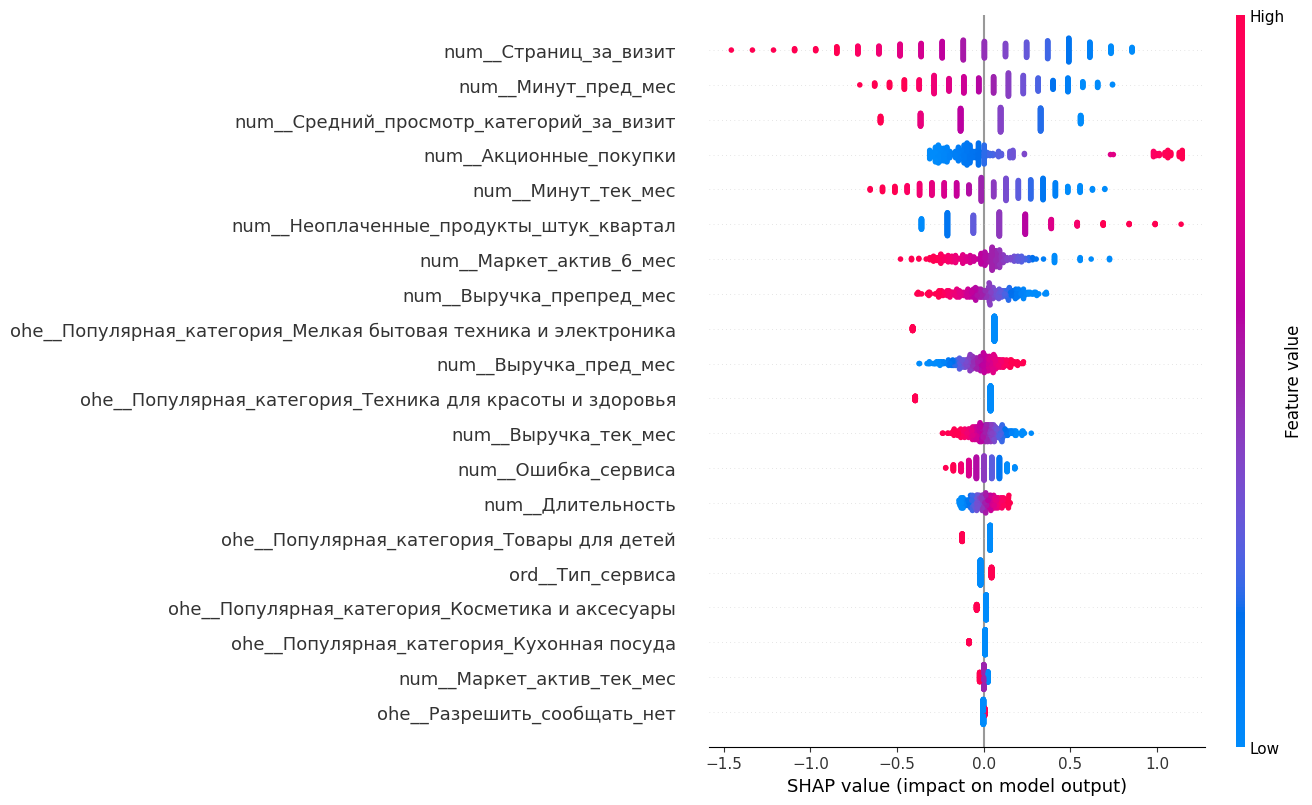

In [69]:
shap.plots.beeswarm(shap_values, max_display=20) 

In [70]:
# выведем первые пять предсказаний и вероятности снижения (класс 0)
for i in range(0,6):
    print(f'{y_test_pred[i]:18}{y_test_pred_prob[i][1].round(3)}')

Прежний уровень   0.413
Снизилась         0.784
Прежний уровень   0.052
Снизилась         0.7
Снизилась         0.936
Прежний уровень   0.19


In [71]:
# выведем самые важные входные признаки первых пяти предсказаний
X_test[['Страниц_за_визит', 'Минут_пред_мес', 'Минут_тек_мес']].head()

,Страниц_за_визит,Минут_пред_мес,Минут_тек_мес
id,,,
216446,7,15,20
215469,5,12,8
216301,14,17,13
215713,3,12,14
215500,4,11,12


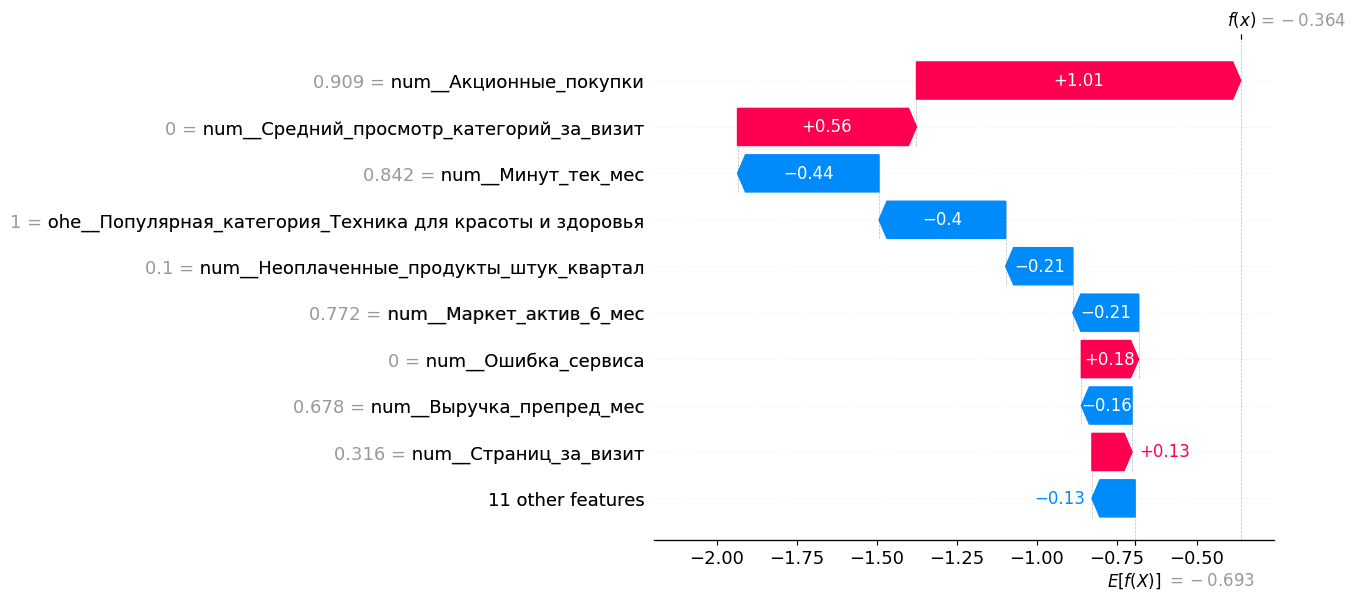

In [72]:
# рассмотрим влияние признаков на первое предсказание "Прежний уровень"
shap.plots.waterfall(shap_values[0]) 

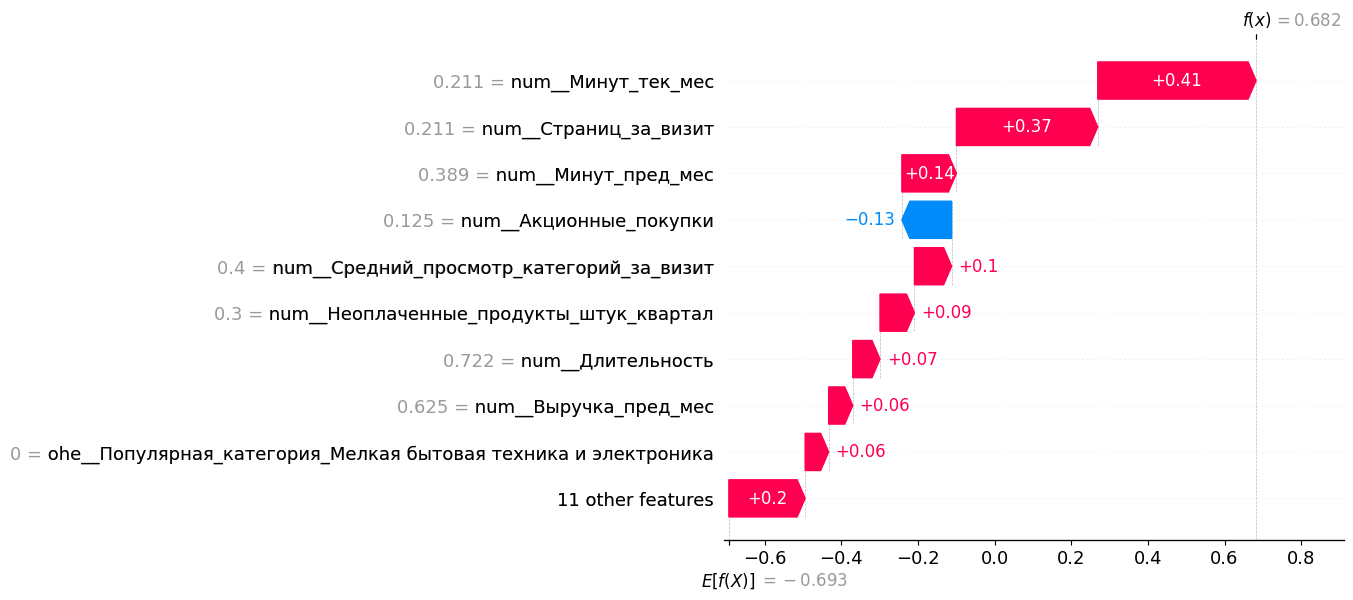

In [73]:
# рассмотрим влияние признаков на второе предсказание "Снизилась"
shap.plots.waterfall(shap_values[1]) 

**Вывод:**

Наибольшее влияние на покупательскую активность оказывает количество просмотренных страниц за визит на сайт, количество времени, которое покупатель проводит на сайте и среднее число просмотренных категорий за месяц.

Высокие значения этих показателей снижают вероятность того, что по прогнозу будет присвоен класс "Снизилась". Другими словами, чем больше страниц и категорий покупатели просматривают на сайте, и больше времени там проводят, тем меньше вероятность что их уровень покупательской активности снизится, скорее наоборот.

Такие показатели, как тип сервиса, количество маркетинговых коммуникаций, согласие на рекламу и т.д. практически не влияют на снижение покупательской активности. 

## Сегментация покупателей

1. Выполним сегментацию покупателей. Используем результаты моделирования и данные о прибыльности покупателей.
2. Выберем группу покупателей и предложим, как увеличить её покупательскую активность: 
- Проведем графическое и аналитическое исследование группы покупателей.
- Сделаем предложения по работе с сегментом для увеличения покупательской активности.

### Выбор целевой группы покупателей

Используя данные лучшей модели выведем вероятности снижения покупательской активности и сформируем таблицу целевых покупателей.

In [74]:
df_result = pd.DataFrame(pd.concat([pd.Series(randomized_search.predict_proba(X_test)[:,1]),
                                   pd.Series(X_test.index)], axis = 1))

df_result.columns = ['Вероятность_снижения', 'id']

# делаем столбец 'id' индексом датафрейма
df_result = df_result.set_index('id')

# выведем результат
df_result

,Вероятность_снижения
id,
216446,0.412620
215469,0.783565
216301,0.052209
215713,0.700451
215500,0.935872
...,...
215568,0.760933
216119,0.212826
215504,0.981328


In [75]:
# делаем столбец 'id' индексом датафрейма c прибылью
money = money.set_index('id')

# выведем данные прибыли
money.head()

,Прибыль
id,
215348,0.98
215349,4.16
215350,3.13
215351,4.87
215352,4.21


In [76]:
# объединим датафреймы по id
# должен получиться дадафрейм с 2 столбцами и, желательно, 325 строками
df_result = df_result.join(money, how='inner')

# выведем первые строки
df_result.head()

,Вероятность_снижения,Прибыль
id,,
216446,0.412620,4.47
215469,0.783565,3.76
216301,0.052209,4.34
215713,0.700451,4.42
215500,0.935872,4.99


In [77]:
# размеры итогового датафрейма
df_result.shape

(325, 2)

Объединение прошло корректно. Результирующий датафрейм готов к анализу.

In [78]:
# выведем описательные статистики
df_result.describe()

,Вероятность_снижения,Прибыль
count,325.000000,325.000000
mean,0.398261,3.955785
std,0.361042,1.023005
min,0.004906,0.860000
25%,0.080008,3.260000
50%,0.229146,4.060000
75%,0.791178,4.620000
max,0.999990,7.430000


Выберем целевую группу покупателей со следующими показателями:
- высокая вероятностью снижения покупательской активности;
- высокое значение прибыли от покупателя;
- согласие на получение рекламы.

Удержать покупателей можно персональными скидками и интересными предложениями. Если покупатель отказался от маркетинговых коммуникаций, то предложение ему нельзя будет сделать. Следовательно для отбора целевой группы примем согласие на рекламу за обязательное условие.

Далее объедимим исходные данные для прогнозов `X_test` и итоговую таблицу `df_result` для анализа и подбора персональных предложений.

In [79]:
# объедимим исходные данные и прогноз
df_result = df_result.join(X_test, how='inner')
df_result.head()

,Вероятность_снижения,Прибыль,Тип_сервиса,Разрешить_сообщать,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Популярная_категория,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит,Выручка_пред_мес,Выручка_препред_мес,Выручка_тек_мес,Минут_пред_мес,Минут_тек_мес
id,,,,,,,,,,,,,,,,,,
216446,0.412620,4.47,стандарт,да,5.3,5,433,0.91,Техника для красоты и здоровья,1,1,0,7,4712.0,5160.0,5230.7,15,20
215469,0.783565,3.76,премиум,да,4.1,3,813,0.22,Домашний текстиль,3,3,4,5,5403.5,4889.0,5228.0,12,8
216301,0.052209,4.34,премиум,да,3.9,5,410,0.20,Косметика и аксесуары,3,1,5,14,5052.5,5348.0,4926.4,17,13
215713,0.700451,4.42,стандарт,да,4.6,5,293,0.24,Товары для детей,1,3,3,3,4821.0,4872.0,5221.4,12,14
215500,0.935872,4.99,стандарт,да,3.5,4,573,0.40,Косметика и аксесуары,2,4,1,4,4137.0,4278.0,3808.1,11,12


In [80]:
# размеры итогового датафрейма
df_result.shape

(325, 18)

Объединение прошло успешно.

In [81]:
# отсортируем клиентов с вероятностью снижения покупательской активности > 0.7,
# показателем прибыли > 4, согласных на рекламу. Запишем в новый датафрейм "target_customers"
target_customers=( 
 df_result.query('Вероятность_снижения > 0.5 and Прибыль > 4 and Разрешить_сообщать == "да"'))
print('Число целевых клиентов: ', target_customers.shape[0])
print(f'Доля от общего числа клиентов: {round((target_customers.shape[0] / df_result.shape[0] * 100),2)} %')

Число целевых клиентов:  46
Доля от общего числа клиентов: 14.15 %


**Вывод:**

Целевая группа покупателей выделена. Данные готовы к анализу.

### Анализ основных показателей целевой группы

Сравним основные показатели целевых покупателей с показателями по всем имеющимся данным (см. Исследовательский анализ данных).

#### Самая популярная категория товаров

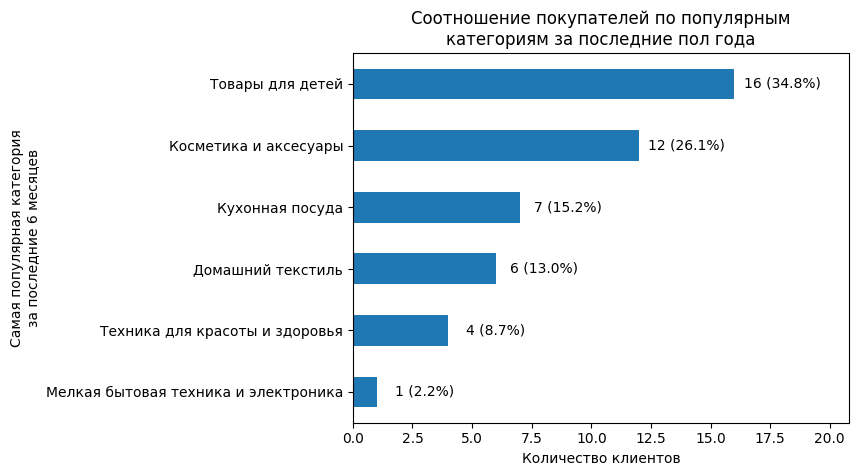

In [82]:
# Выясним любимую категорию целевых клиентов
data=target_customers['Популярная_категория'].value_counts().sort_values(ascending=True)
ax=data.plot(kind='barh', rot=0)

# подписываем и расставляем значения столбцов
for p in ax.patches:
    ax.annotate(
        (f'{p.get_width()} ({(p.get_width()/data.sum()*100).round(1)}%)'), 
                (p.get_x() + p.get_width() + 2, p.get_y() + p.get_height() * 0.5), 
                ha='center', 
                va='center')
    
# увеличиваем расстояние до края
plt.margins(0.3)

plt.title('Соотношение покупателей по популярным\nкатегориям за последние пол года')
plt.xlabel("Количество клиентов")
plt.ylabel("Самая популярная категория\nза последние 6 месяцев")
plt.show()

**Вывод:**

Три самые популярные категории товаров среди целевой группы:
- Товары для детей; 
- Косметика и аксесcуары;
- Кухонная посуда.

Три самые популярные категории товаров по всей выборке:
- Товары для детей; 
- Домашний текстиль;
- Косметика и аксесcуары;

Предпочтения целевой группы немного отличаются.

#### Тип сервиса

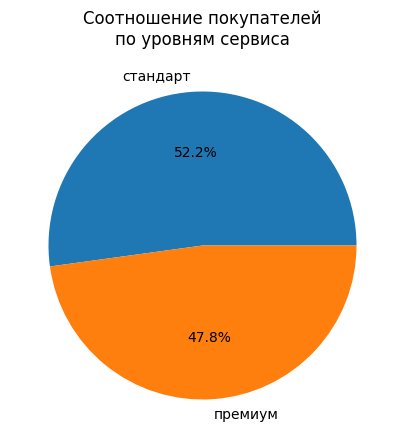

In [83]:
# построим круговую диаграмму
func_pie(series=target_customers['Тип_сервиса'],
         name='Соотношение покупателей\nпо уровням сервиса',
         size=5)  

**Вывод:**

Среди всех рассмотренных клиентов премиум-покупателей 28,9%, среди целевой выборки 47,8%, т.е. почти половина.

#### Cреднемесячное значение маркетинговых коммуникаций на покупателя за последние 6 месяцев

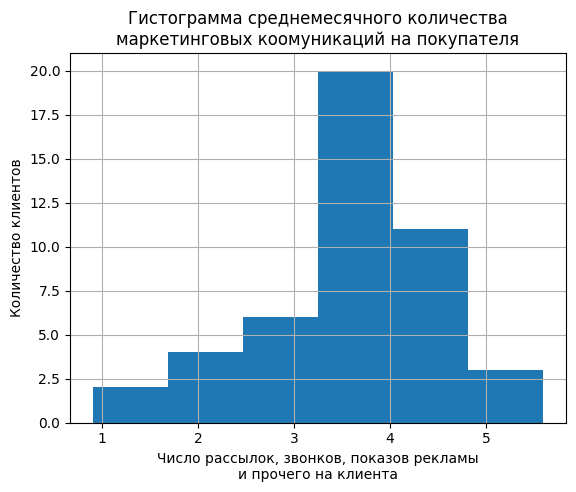

Основные описательные статистики:
count    46.000000
mean      3.671739
std       0.912058
min       0.900000
25%       3.225000
50%       3.900000
75%       4.100000
max       5.600000
Name: Маркет_актив_6_мес, dtype: float64


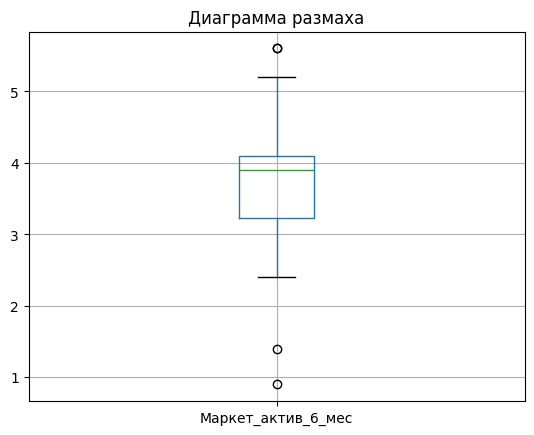

In [84]:
# построим гистограмму 
target_customers['Маркет_актив_6_мес'].plot(
    kind='hist',
    grid=True,
    bins=6,
    title = 'Гистограмма среднемесячного количества\nмаркетинговых коомуникаций на покупателя')
plt.xlabel('Число рассылок, звонков, показов рекламы\nи прочего на клиента')
plt.ylabel('Количество клиентов')
plt.show()

# получим описательные статистики
print('Основные описательные статистики:')
print(target_customers['Маркет_актив_6_мес'].describe())

# построим диаграмму размаха
target_customers.boxplot(column='Маркет_актив_6_мес')
plt.title('Диаграмма размаха')
plt.show()

**Вывод:**

Медиана по среднемесячному количеству маркетинговых коммуникаций для целовых покупателей 3,9, тогда как по всей выборке 4,2. 

#### Время с момента регистрации покупателя на сайте

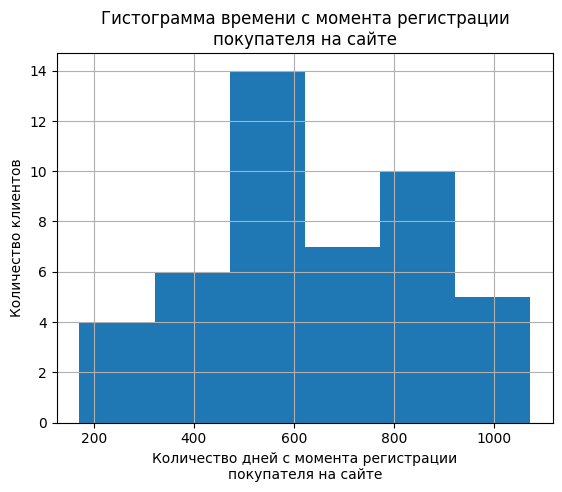

Основные описательные статистики:
count      46.000000
mean      639.195652
std       242.183550
min       171.000000
25%       488.500000
50%       574.500000
75%       843.750000
max      1073.000000
Name: Длительность, dtype: float64


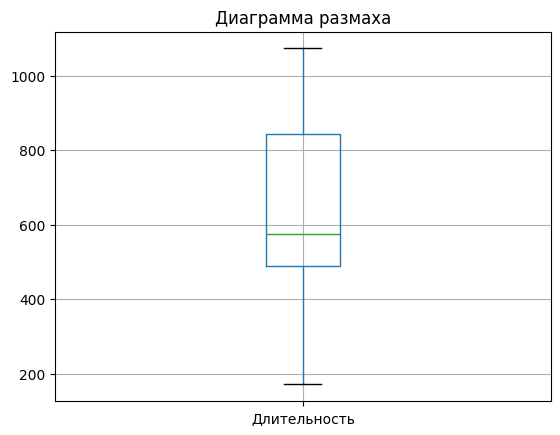

In [85]:
# построим гистограмму 
target_customers['Длительность'].plot(
    kind='hist',
    grid=True,
    bins=6,
    title = 'Гистограмма времени с момента регистрации\nпокупателя на сайте')
plt.xlabel('Количество дней с момента регистрации\nпокупателя на сайте')
plt.ylabel('Количество клиентов')
plt.show()

# получим описательные статистики
print('Основные описательные статистики:')
print(target_customers['Длительность'].describe())

# построим диаграмму размаха
plt.title('Диаграмма размаха')
target_customers.boxplot(column='Длительность')
plt.show()

**Вывод:**

По показателю времени с момента регистрации существенных различий между целевой группой и всей выборкой не наблюдается.

#### Среднее число категорий, которое покупатель просмотрел за визит за последний месяц

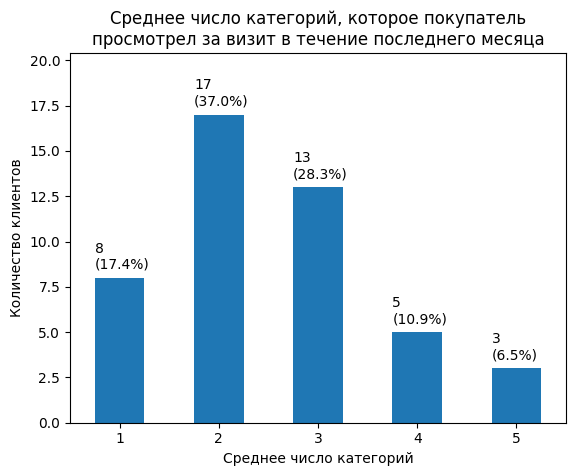

Основные описательные статистики:
count    46.000000
mean      2.521739
std       1.110338
min       1.000000
25%       2.000000
50%       2.000000
75%       3.000000
max       5.000000
Name: Средний_просмотр_категорий_за_визит, dtype: float64


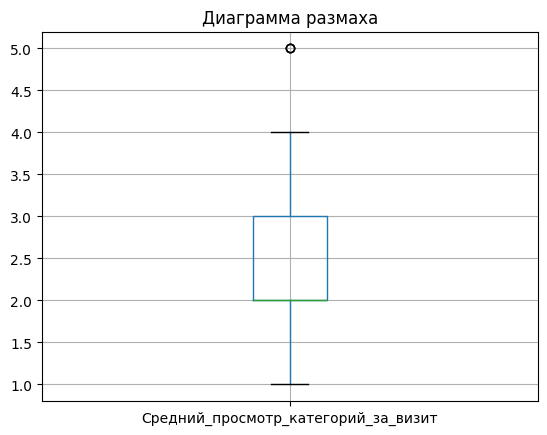

In [86]:
data=target_customers['Средний_просмотр_категорий_за_визит'].value_counts().sort_index(ascending=True)
ax=data.plot(kind='bar', rot=0)

# подписываем и расставляем значения столбцов
for patch in ax.patches:
    ax.annotate(
        (f'{patch.get_height()}\n({(patch.get_height()/data.sum()*100).round(1)}%)'),
        (patch.get_x(), patch.get_height()+0.5))
    
# увеличиваем расстояние до края
plt.margins(0.2)

plt.title('Среднее число категорий, которое покупатель\nпросмотрел за визит в течение последнего месяца')
plt.xlabel("Среднее число категорий")
plt.ylabel("Количество клиентов")
plt.show()

# получим описательные статистики
print('Основные описательные статистики:')
print(target_customers['Средний_просмотр_категорий_за_визит'].describe())

# построим диаграмму размаха
target_customers.boxplot(column='Средний_просмотр_категорий_за_визит')
plt.title('Диаграмма размаха')
plt.show()

**Вывод:**

По сравнению со всей выборкой среднее число просмотренных за последний месяц категорий у целевых клиентов ниже, медианное значение равно двум вместо трёх.

#### Общее число неоплаченных товаров в корзине за последние 3 месяца

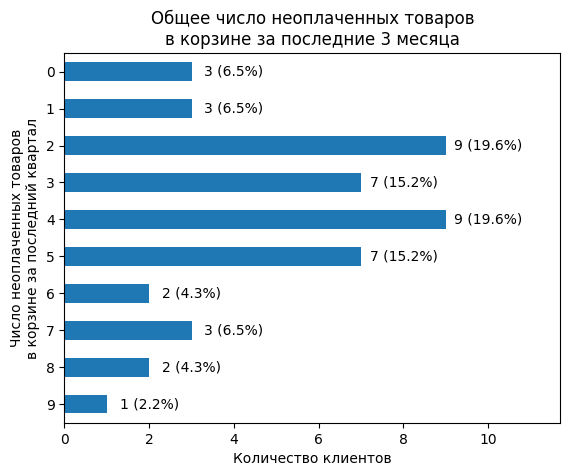

Основные описательные статистики:
count    46.000000
mean      3.717391
std       2.177287
min       0.000000
25%       2.000000
50%       4.000000
75%       5.000000
max       9.000000
Name: Неоплаченные_продукты_штук_квартал, dtype: float64


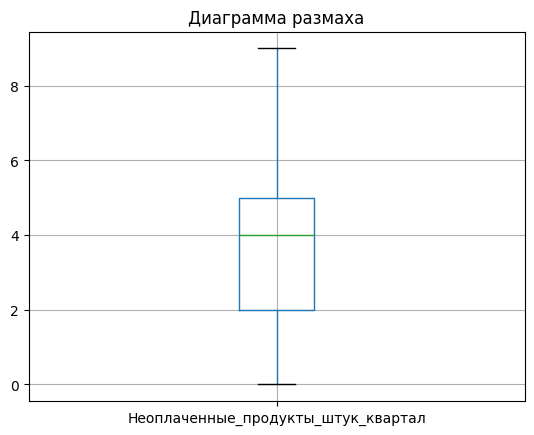

In [87]:
data=target_customers['Неоплаченные_продукты_штук_квартал'].value_counts().sort_index(ascending=False)
ax=data.plot(kind='barh', rot=0)

# подписываем и расставляем значения столбцов
for p in ax.patches:
    ax.annotate(
        (f'{p.get_width()} ({(p.get_width()/data.sum()*100).round(1)}%)'), 
                (p.get_x() + p.get_width() + 1, p.get_y() + p.get_height() * 0.5), 
                ha='center', 
                va='center')
    
# увеличиваем расстояние до края
plt.margins(0.3)

plt.title('Общее число неоплаченных товаров\nв корзине за последние 3 месяца')
plt.xlabel("Количество клиентов")
plt.ylabel("Число неоплаченных товаров\nв корзине за последний квартал")
plt.show()

# получим описательные статистики
print('Основные описательные статистики:')
print(target_customers['Неоплаченные_продукты_штук_квартал'].describe())

# построим диаграмму размаха
target_customers.boxplot(column='Неоплаченные_продукты_штук_квартал')
plt.title('Диаграмма размаха')
plt.show()

**Вывод:**

Общее число неоплаченных товаров у целевой группы выше, медиана равна 4, а по всей выборке - 3. 

#### Число сбоев при посещении сайта

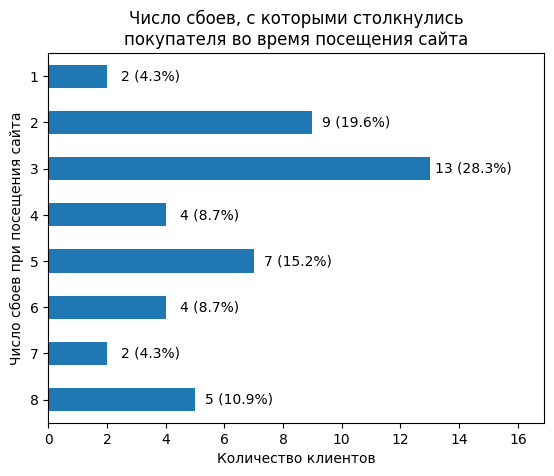

Основные описательные статистики:
count    46.000000
mean      4.086957
std       2.042070
min       1.000000
25%       3.000000
50%       3.000000
75%       5.000000
max       8.000000
Name: Ошибка_сервиса, dtype: float64


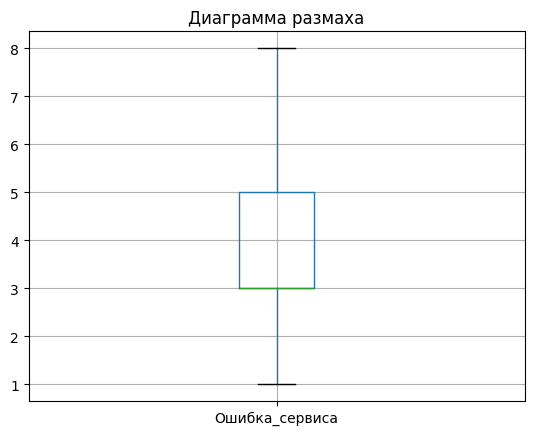

In [88]:
data=target_customers['Ошибка_сервиса'].value_counts().sort_index(ascending=False)
ax=data.plot(kind='barh', rot=0)

# подписываем и расставляем значения столбцов
for p in ax.patches:
    ax.annotate(
        (f'{p.get_width()} ({(p.get_width()/data.sum()*100).round(1)}%)'), 
                (p.get_x() + p.get_width() + 1.5, p.get_y() + p.get_height() * 0.5), 
                ha='center', 
                va='center')
    
# увеличиваем расстояние до края
plt.margins(0.3)

plt.title('Число сбоев, c которыми столкнулись\nпокупателя во время посещения сайта')
plt.xlabel("Количество клиентов")
plt.ylabel("Число сбоев при посещения сайта")
plt.show()

# получим описательные статистики
print('Основные описательные статистики:')
print(target_customers['Ошибка_сервиса'].describe())

# построим диаграмму размаха
target_customers.boxplot(column='Ошибка_сервиса')
plt.title('Диаграмма размаха')
plt.show()

**Вывод:**

По числу сбоев значимых различий между целевой группой и всей выборкой не наблюдается.

#### Среднее количество страниц, которые просмотрел покупатель за один визит на сайт за последние 3 месяца

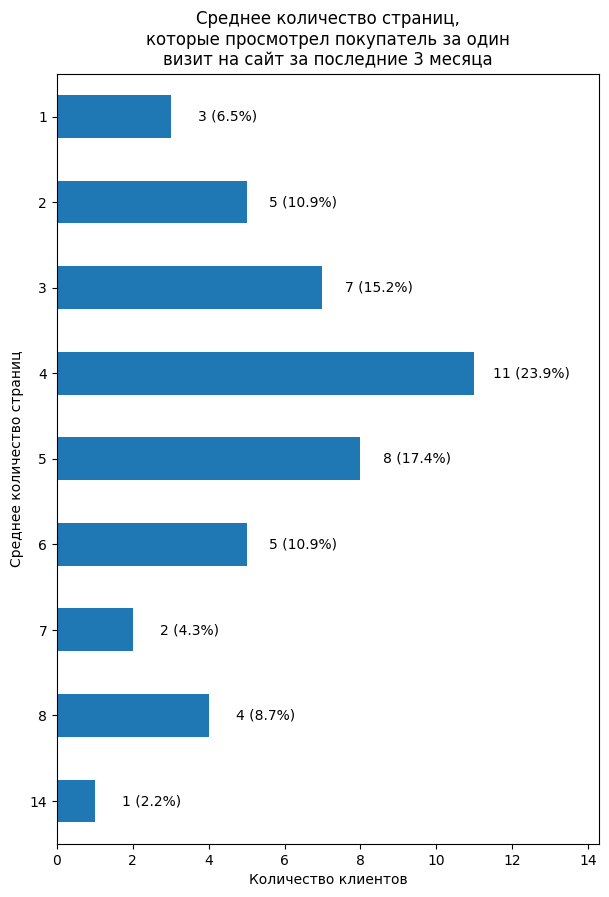

Основные описательные статистики:
count    46.000000
mean      4.521739
std       2.363981
min       1.000000
25%       3.000000
50%       4.000000
75%       5.750000
max      14.000000
Name: Страниц_за_визит, dtype: float64


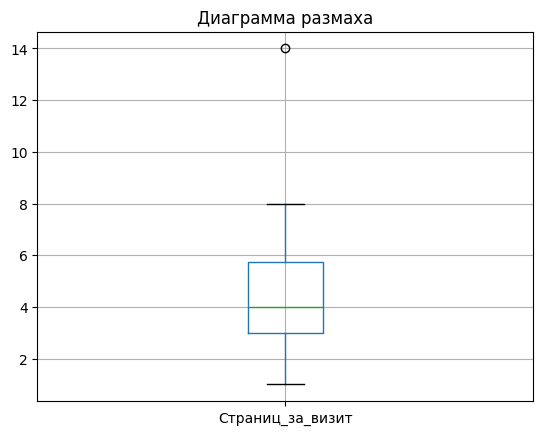

In [89]:
data=target_customers['Страниц_за_визит'].value_counts().sort_index(ascending=False)
ax=data.plot(kind='barh', rot=0)

# подписываем и расставляем значения столбцов
for p in ax.patches:
    ax.annotate(
        (f'{p.get_width()} ({(p.get_width()/data.sum()*100).round(1)}%)'), 
                (p.get_x() + p.get_width() + 1.5, p.get_y() + p.get_height() * 0.5), 
                ha='center', 
                va='center')
    
# увеличиваем расстояние до края
plt.margins(0.3)

plt.title('Среднее количество страниц,\nкоторые просмотрел покупатель за один\nвизит на сайт за последние 3 месяца')
plt.xlabel("Количество клиентов")
plt.ylabel("Среднее количество страниц")
fig = plt.gcf()
fig.set_size_inches(7,10) 
plt.show()

# получим описательные статистики
print('Основные описательные статистики:')
print(target_customers['Страниц_за_визит'].describe())

# построим диаграмму размаха
target_customers.boxplot(column='Страниц_за_визит')
plt.title('Диаграмма размаха')
plt.show()

**Вывод:**

По среднему количеству страниц, которые просмотрел покупатель за один визит на сайт за последние 3 месяца:
медианное значение у целевой группы в 2 раза ниже, чем по всей выборке - 4 против 8.

**Вывод:**

Мы выбрали целевую группу покупателей по следующим параметрам:
- высокая вероятностью снижения покупательской активности;
- высокое значение прибыли от покупателя;
- согласие на получение рекламы.

Каждому покупателю из целевой группы необходимо прислать персонализированное предложение, можно рассмотреть следующие пути:
  - предоставить скидку на интересующую категорию товаров;
  - сделать подборку интересных товаров из интересующей категории и показать покупателю на сайте или прислать письмо на эл. почту, или показать в пуш-уведомлении (если есть моб. приложение).
  - поскольку почти половина целевой группы – это премиум-покупатели, можно предложить им дополнительные бонусы по премиальной программе.
  - количество маркетинговых коммуникаций у целевой группы отстает, поэтому целесообразно немного увеличить частоту предложений.
  - Поскольку число неоплаченных товаров в корзине целевой группы выше, нужно напомнить покупателям об их выборе и, возможно, сделать скидку на какой-то товар в корзине, чтобы подтолкнуть к покупке. 

## Общий вывод

**В ходе проекта мы провели следующую работу:**
- изучили данные, проверили их на предмет аномалий и несоответствий;

Данные в столбцах `"Средний_просмотр_категорий_за_визит"` и `"Страниц_за_визит"` должны быть представлены типом `float`, поскольку это непрерывные величины. Вероятно, заказчик округлил значения в этих столбцах, требуется уточнение.


- произвели предобработку для последующего анализа: изменили названия столбцов, проверили их на пропуски и дубликаты, исправили ошибки;


- произвели исследовательский анализ основных показателей: 
  - покупательская активность;
  - тип сервиса;
  - согласие на рекламу;
  - самая популярная категория товаров;
  - среднемесячное значение маркетинговых коммуникаций на покупателя за последние 6 месяцев;
  - количество маркетинговых коммуникаций на покупателя в текущем месяце;
  - время с момента регистрации покупателя на сайте;
  - среднее число категорий, которое покупатель просмотрел за визит за последний месяц;
  - общее число неоплаченных товаров в корзине за последние 3 месяца;
  - число сбоев при посещении сайта;
  - среднее количество страниц, которые просмотрел покупатель за один визит на сайт за последние 3 месяца;
  - выручка с каждого покупателя;
  - время, которое покупатель провёл на сайте в течение периода;
  - среднемесячная прибыль от каждого покупателя за последний квартал.
  
  
-  объединили данные из разных таблиц;


- произвели корреляционный анализ и установили взаимосвязь между признаками;


- подготовили данные и обучили 4 модели:
  - KNeighborsClassifier;
  - DecisionTreeClassifier;
  - LogisticRegression;
  - SVC.
  
  
- произвели анализ результатов работы моделей и выбрали лучшую по метрике ROC-AUC;


- произвели анализ важности признаков;


- Сделали прогноз для тестовой выборки, вывели вероятности снижения покупательской активности и выделили сегмент целевых покупателей по следующим критериям:

  - высокая вероятностью снижения покупательской активности (> 0,5);
  - высокое значение прибыли от покупателя (> 4);
  - согласие на получение рекламы.
  

- произвели анализ целевой группы.

**Результаты:**

Лучшей моделью для решения нашей задачи является SVC(C=1, degree=2, gamma=1, kernel='linear'). Метрика ROC-AUC лучшей модели на тренировочной и тестовой выборке 0.89 и 0,91 соответственно.

Наибольшее влияние на покупательскую активность оказывает количество просмотренных страниц за визит на сайт, количество времени, которое покупатель проводит на сайте и среднее число просмотренных категорий за месяц.

Высокие значения этих показателей снижают вероятность того, что по прогнозу будет присвоен класс "Снизилась". Другими словами, чем больше страниц и категорий покупатели просматривают на сайте, и больше времени там проводят, тем меньше вероятность что их уровень покупательской активности снизится, скорее наоборот.

Такие показатели, как тип сервиса, количество маркетинговых коммуникаций, согласие на рекламу и т.д. практически не влияют на снижение покупательской активности. 
Влияние всех признаков – см. Анализ важности признаков.

По заданным критериям в целевую группу вошли 14% покупателей из тестовой выборки. Необходимо недопустить снижение их потребительской активности.

Три самые популярные категории товаров среди выбранной группы:
  - Товары для детей; 
  - Косметика и аксессуары;
  - Кухонная посуда; 
  
**Рекомендации:**

Каждому покупателю из целевой группы необходимо прислать персонализированное предложение. Можно рассмотреть следующие пути:
  - предоставить скидку на интересующую категорию товаров;
  - сделать подборку интересных товаров из интересующей категории и показать покупателю на сайте или прислать письмо на эл. почту, или показать в пуш-уведомлении (если есть моб. приложение).
  - поскольку почти половина целевой группы – это премиум-покупатели, можно предложить им дополнительные бонусы по премиальной программе.
  - количество маркетинговых коммуникаций у целевой группы отстает, поэтому целесообразно немного увеличить частоту предложений.
  - Поскольку число неоплаченных товаров в корзине целевой группы выше, нужно напомнить покупателям об их выборе и, возможно, сделать скидку на какой-то товар в корзине, чтобы подтолкнуть к покупке. 
  - Также имеет смысл провести на сайте короткий опрос, что именно клиенты хотели бы улучшить, и выбрать интересные предложения.
  
Можно разделить покупателей на группы и для каждой группы попробовать разные комбинации маркетинговых предложений, затем собрать информацию об их эффективности и затратам на реализацию. Данная информация поможет выяснить максимально эффективный путь удержания клиентов, а также максимизировать экономический эффект. 